In [106]:
import pandas as pd
import os
os.chdir("/home/eric/Nextcloud/Documents/Honors Capstone/nuclear/datasets/Bisconti")
dataframe1 = pd.read_excel("2206631 - Final Data excel .xlsx")

# Bisconti data set (2022)

## Interesting possible comparisons

*simple demographic comparisons*

Q10 vs Gender (Q1)  
Q10 vs Ethnicity (Q3)  
Q10 vs Q4 (Education)  
Q10 vs Q5a (Political views)  

*nuanced comparisons*
Q10 vs Q6r1: Q6r1: Affordable electricity - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r2: Reliable electricity - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r3: Clean air - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r4: Preservation of natural resources - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r5: Efficiency - How important to you are the following considerations for the way electricity is produced?
Q10 vs Q6r7: Economic growth - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r8: Job creation - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r9: Climate change solution - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r10: Resilience - How important to you are the following considerations for the way electricity is produced?  
Q10 vs Q6r11: Small footprint (less land use) - How important to you are the following considerations for the way electricity is produced?  

*since this is on a scale of important to not important, we need to flatten this structure to create a diagram of importance*

#### *We can use the Q7 version of these above questions to create a pie chart to show what Americans want the most in their energy*
Q7r1 vs Q7r2 vs Q7r3 vs Q7r4 vs Q7r5 vs Q7r6 vs Q7r7


*Glossary*
Q10 = Overall, do you strongly favor, somewhat favor, somewhat oppose, or strongly oppose the use of nuclear energy as one of the ways to provide electricity in the United States?'

## General Notes

Date: June 2022

- Bisconti the research team and has a clear bias towards nuclear energy
    * she is part of the Nuclear Energy Institute (NIU)
- Survey for June 2022 data was taken from ~1000 full-time residents that live within the 10-mile radius of nearly all nuclear power plants in the U.S
    * Households with people who work at a nuclear power plant were excluded due to vested interest
    * Bisconti Research conducted the survey with Quest Mindshare
    * The Nuclear Energy Institute sponsored all nine plant neighbor surveys
    
For Bisconti's other surveys, survey included 1,000 nationally representative US adults. Perhaps that was done here as well??

In [107]:
#os.chdir("/home/eric/Nextcloud/Documents/Honors Capstone/nuclear/datasets/Bisconti")
#df_csv = pd.read_csv("Bisconti.csv")
#df_csv.columns

In [108]:
def plot_bar_or_pie(column, title, pie_flag = True, bar_flag = False):
    import plotly.express as px
    my_dict = {} # dictionary to hold list of strings of approval
    
    df2 = dataframe1[[column, "Q10"]] # grabs subset of questions
    for idx, row in df2.iterrows():
        #print(idx, row["hAge1"], row["Q10"])
        if(row[column] not in my_dict): #checks if category (ie 18-34, 45-50, 50+) is in dictionary or not.
            my_dict[row[column]] = [row["Q10"]]
            #print([row["Q10"]])
            pass
        else:
            my_dict[row[column]].append(row["Q10"])

            
    for key, val in my_dict.items():
        print(key)
        #print(val)
        print('Strongly favor:', val.count('Strongly favor'))
        print('Somewhat favor:', val.count('Somewhat favor'))
        print('Somewhat oppose:', val.count('Somewhat oppose'))
        print('Strongly oppose:', val.count('Strongly oppose'))

        att_list = [val.count('Strongly favor'), val.count('Somewhat favor'), val.count('Somewhat oppose'), val.count('Strongly oppose')]
        att_list_types = ['Strongly favor', 'Somewhat favor', 'Somewhat oppose', 'Strongly oppose']
        fig = px.bar(x = att_list_types, y = att_list, title=title.format(key=key), template='plotly_dark').update_layout(
        xaxis_title="Attitudes", yaxis_title="Number of responses"
    )
        if bar_flag:
            fig.show()

        #template='plotly_dark' for dark mode
        fig = px.pie(values = att_list, names = att_list_types, title=title.format(key=key))
        if pie_flag:
            fig.show()

In [109]:
def plot_whole_population(column, title, pie_flag = True, bar_flag = False):
    import plotly.express as px
    my_dict = {} # dictionary to hold list of strings of approval
    
    df_col_list = dataframe1[column].tolist() # grabs subset of questions
    
    att_list_types = list(set(df_col_list))
    att_list = [val.count('Strongly favor'), val.count('Somewhat favor'), val.count('Somewhat oppose'), val.count('Strongly oppose')]
    
#plot_whole_population("Q6r2", "Test")

In [110]:
def mean_df_gen(col_name):
    #Mean of groups
    temp_df = dataframe1[[col_name, "Q10"]].copy()
    temp_df['Q10'] = temp_df['Q10'].map({"Strongly oppose": 1, "Somewhat oppose": 2, "Somewhat favor": 3, "Strongly favor": 4})
    mean_df = temp_df.groupby([col_name])['Q10'].mean().reset_index().copy()
    return mean_df

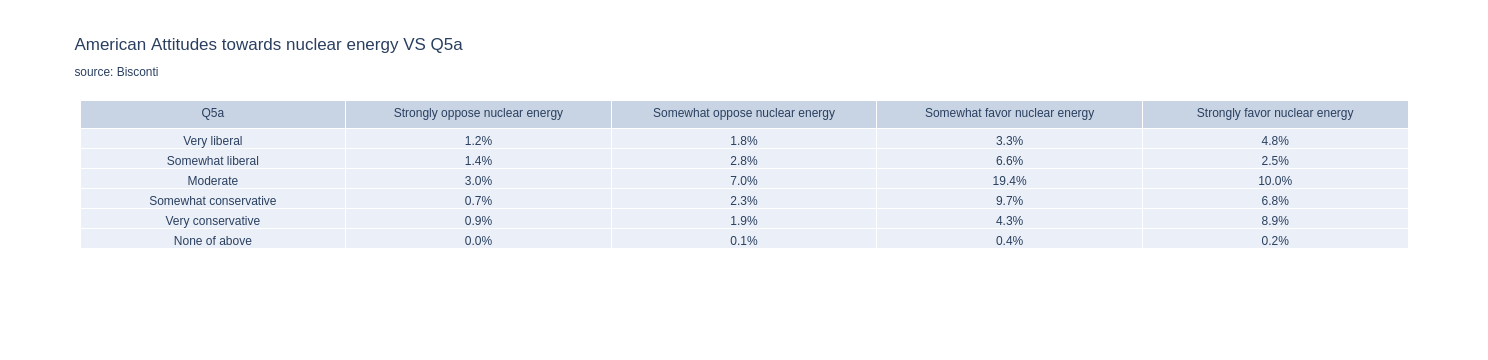

In [111]:
from collections import OrderedDict
from plotly.colors import n_colors
import numpy as np
import plotly.graph_objects as go
np.random.seed(1)

fav_list = ["Strongly oppose", "Somewhat oppose", "Somewhat favor", "Strongly favor"]
pol_leaning = ['Very liberal', 'Somewhat liberal', 'Moderate', 'Somewhat conservative', 'Very conservative', 'None of above']
def calc_percentage(val, total):
    return ((val/total)*100)

def create_table(df, compare_col, val_order, y_axis_title = None):
    if y_axis_title is None:
        y_axis_title = compare_col
    
    category_list = val_order
    results = OrderedDict()
    table_list = [category_list]
    
    
    colors = n_colors('rgb(255, 200, 200)', 'rgb(200, 0, 0)', 9, colortype='rgb')
    
    for i in fav_list:
        temp_list = []
        for y in category_list:
            df_tmp = df.copy()
            # drop NaN values
            df_tmp.dropna(subset=["Q10"], inplace = True)
            df_tmp.dropna(subset=[compare_col], inplace = True)
            
            rslt_df = df_tmp.loc[(df_tmp['Q10'] == i) & (df_tmp[compare_col] == y)]
            # print(rslt_df[["Q10", compare_col]])
            # print(dict(df[compare_col].value_counts()))
            # print(df.shape[0])
            results[i, y] = (rslt_df.shape[0] / df.shape[0]) * 100
            temp_list.append(f"{round(((rslt_df.shape[0] / df.shape[0]) * 100), 2)}%")
            # print("i:", i)
            # print("y:", y)
            pass
        table_list.append(temp_list.copy())
        
    # print(results)
    total = 0
    for i in results.values():
        total += i
    # print("total =", total)
    # print(results)
    
    combined_list = [y_axis_title, "Strongly oppose nuclear energy", "Somewhat oppose nuclear energy", "Somewhat favor nuclear energy", "Strongly favor nuclear energy"]
    fig = go.Figure(data=[go.Table(header=dict(values = combined_list),
                 cells=dict(values=table_list,
                            # I would prefer to add color ala a heatmap, but it does not appear to be possible in plotly currently
                           # fill_color=['rgb(245, 245, 245)', colors],
                           )
                            )])
    fig.update_layout(title_text=f"American Attitudes towards nuclear energy VS {y_axis_title}<br><sub>source: Bisconti")
    fig.show()
create_table(dataframe1, "Q5a",  pol_leaning)

In [112]:
# plot_bar_or_pie("hAge1", "Attitudes towards nuclear energy in {key} year olds")

In [113]:
# plot_bar_or_pie("hAge2", "Attitudes towards nuclear energy in {key} year olds")

In [114]:
#plot_bar_or_pie("Q4", "Attitudes towards nuclear energy from people have the following education: {key}")

In [115]:
#plot_bar_or_pie("Q3", "Attitudes towards nuclear energy with {key}s")

In [116]:
#plot_bar_or_pie("Q5a", "Attitudes towards nuclear energy who's political views are generally {key}")
dict(dataframe1["Q5a"].value_counts()).keys()

dict_keys(['Moderate', 'Somewhat conservative', 'Very conservative', 'Somewhat liberal', 'Very liberal', 'None of above'])

### Histograms

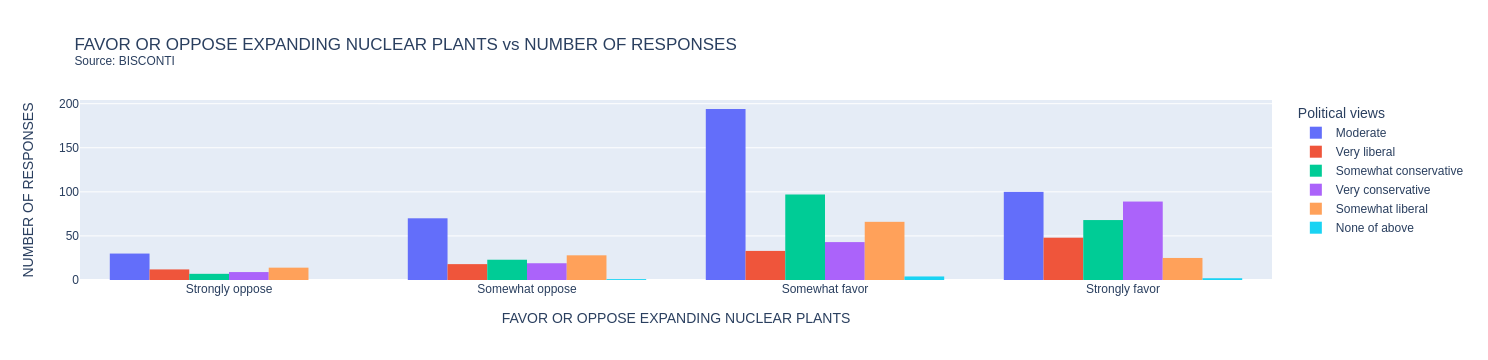

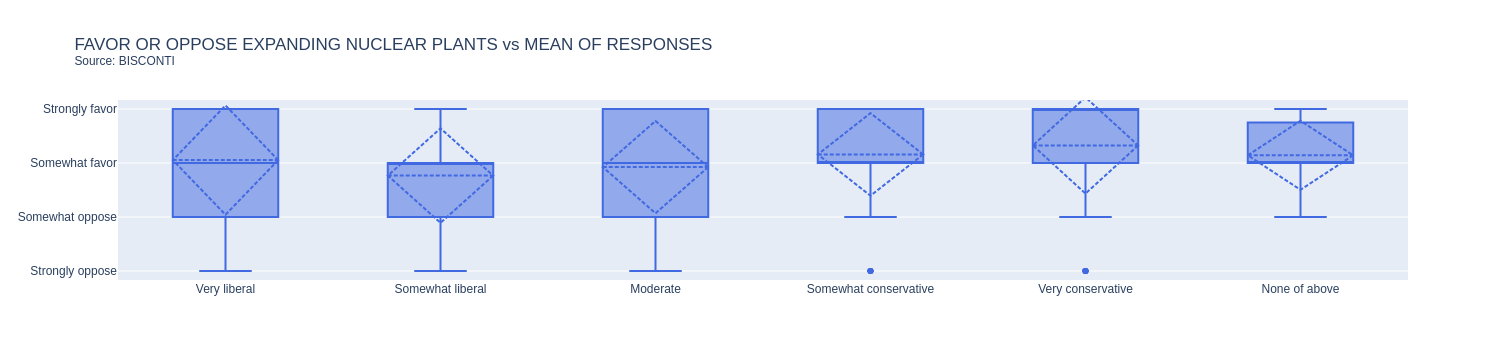

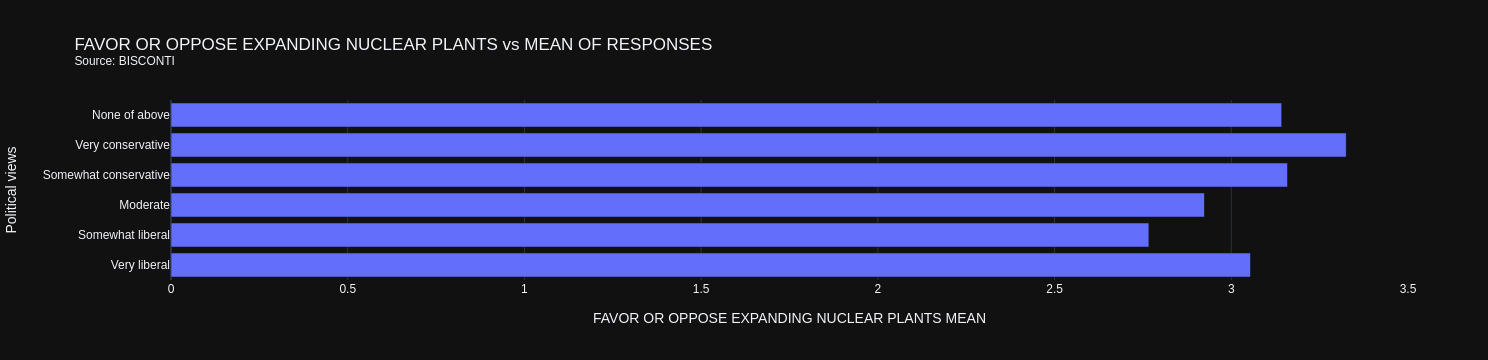

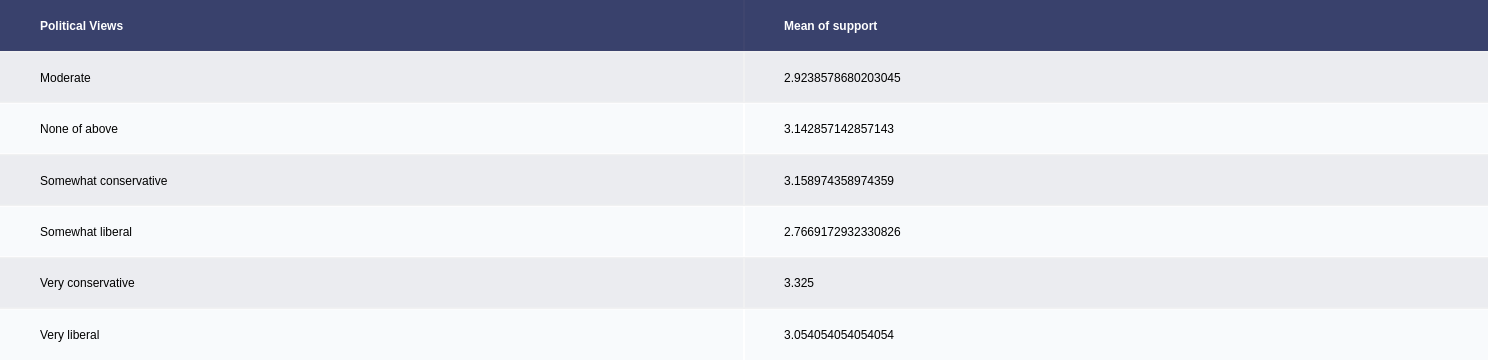

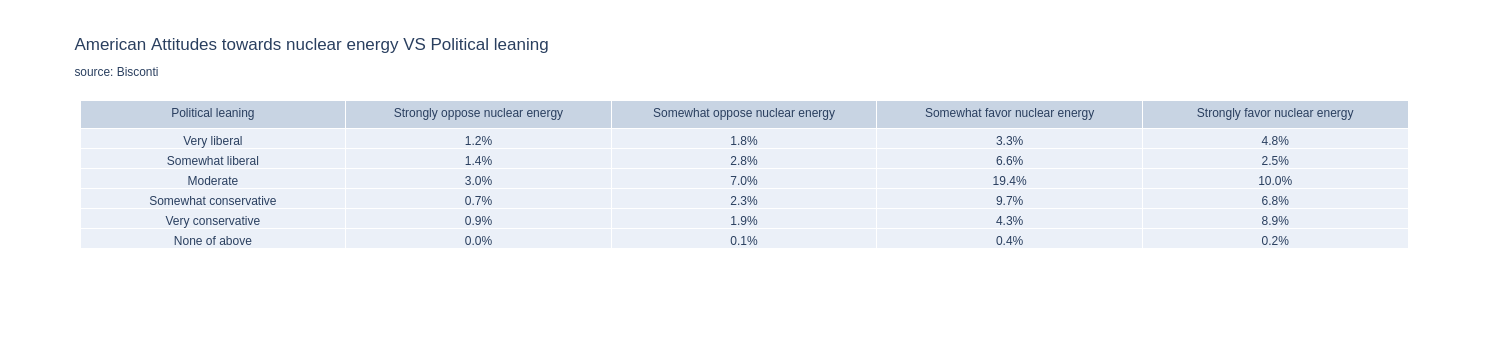

In [117]:
import plotly.express as px
#from plotly.tools import FigureFactory as FF
import plotly.figure_factory as ff
import chart_studio.plotly as py
s = "FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS" + " vs " + "NUMBER OF RESPONSES"

title = s + "<br><sup>Source: BISCONTI<sup>"

fig = px.histogram(dataframe1, x="Q10", color="Q5a", title=title, barmode="group",
                  #category_orders={"Q5a": ['Very liberal', 'Somewhat liberal', 'Moderate', 'Somewhat conservative', 'Very conservative', 'None of above']}
                  ).update_xaxes(categoryorder='array', categoryarray=fav_list).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONSES", legend_title="Political views",
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q5a"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', 
                categoryarray=['Very liberal', 'Somewhat liberal', 'Moderate', 'Somewhat conservative', 'Very conservative', 'None of above'])
fig.update_layout(title_text=title.replace("NUMBER", "MEAN"))
fig.show()

#Get mean
mean_df = mean_df_gen("Q5a")


fig = px.bar(mean_df, x="Q10", y="Q5a", template='plotly_dark', title=title.replace("NUMBER", "MEAN")).update_yaxes(
    categoryorder='array', categoryarray=['Very liberal', 'Somewhat liberal', 'Moderate', 'Somewhat conservative', 'Very conservative', 'None of above']).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS MEAN", yaxis_title="Political views",
)
#fig.update_layout(legend_traceorder="array", categoryarray=['Moderate', 'Very Liberal', 'Very conservative', 'Somewhat conservative', 'Somewhat liberal', 'None of the above'])
fig.show()

mean_df.columns =["Political Views", "Mean of support"]
fig = ff.create_table(mean_df)
fig.show()

dataframe1["Q5a"].value_counts()

create_table(dataframe1, "Q5a", pol_leaning, "Political leaning")

## Attitudes Americans have on nuclear energy

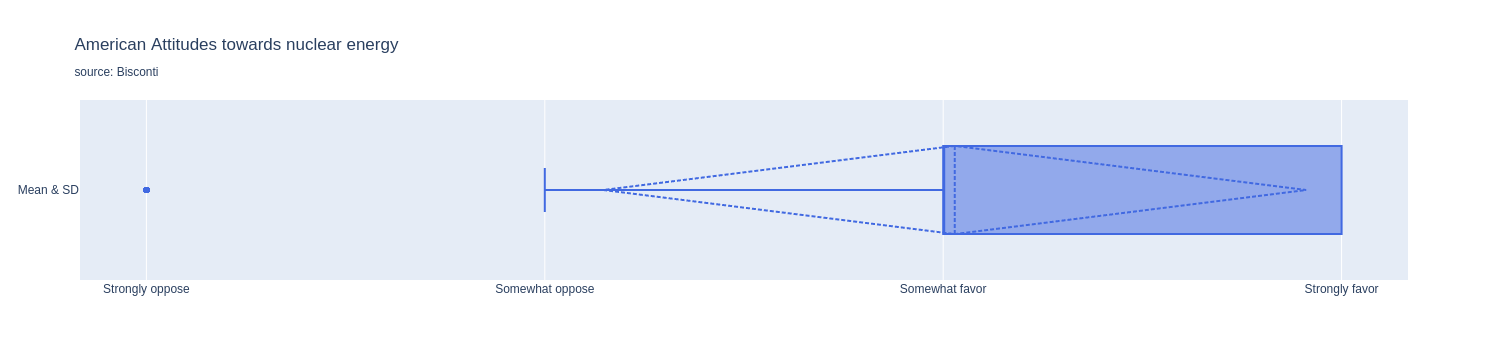

favor:  0.769
oppose:  0.231


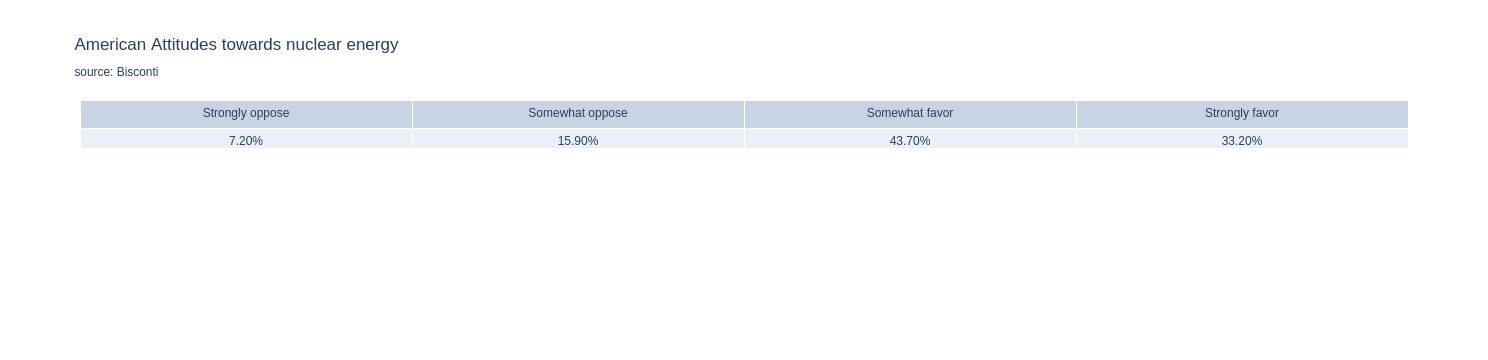

In [118]:
#Q10: Overall, do you strongly favor, somewhat favor, somewhat oppose, or strongly oppose the use of nuclear energy as one of the ways to provide electricity in the United States?
fig = go.Figure()
fig.add_trace(go.Box(
    x=dataframe1["Q10"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_xaxes(categoryorder='array', categoryarray=fav_list)
fig.update_layout(title_text="American Attitudes towards nuclear energy<br><sub>source: Bisconti")
fig.show()

sers = dataframe1['Q10'].value_counts()
fav = sers['Somewhat favor'] + sers['Strongly favor']
opp = sers['Somewhat oppose'] + sers['Strongly oppose']
total = opp + fav
print("favor: ", fav / (fav + opp))
print("oppose: ", opp / (fav + opp))
sers

fig = go.Figure(data=[go.Table(header=dict(values=['Strongly oppose', 'Somewhat oppose', 'Somewhat favor', 'Strongly favor']),
                 cells=dict(values=[[f"{(sers['Strongly oppose']/total)*100:.2f}%"],
                                    [f"{(sers['Somewhat oppose']/total)*100:.2f}%"],
                                    [f"{(sers['Somewhat favor']/total)*100:.2f}%"],
                                    [f"{(sers['Strongly favor']/total)*100:.2f}%"]]
                           ))
                     ])
fig.update_layout(title_text="American Attitudes towards nuclear energy<br><sub>source: Bisconti")
fig.show()

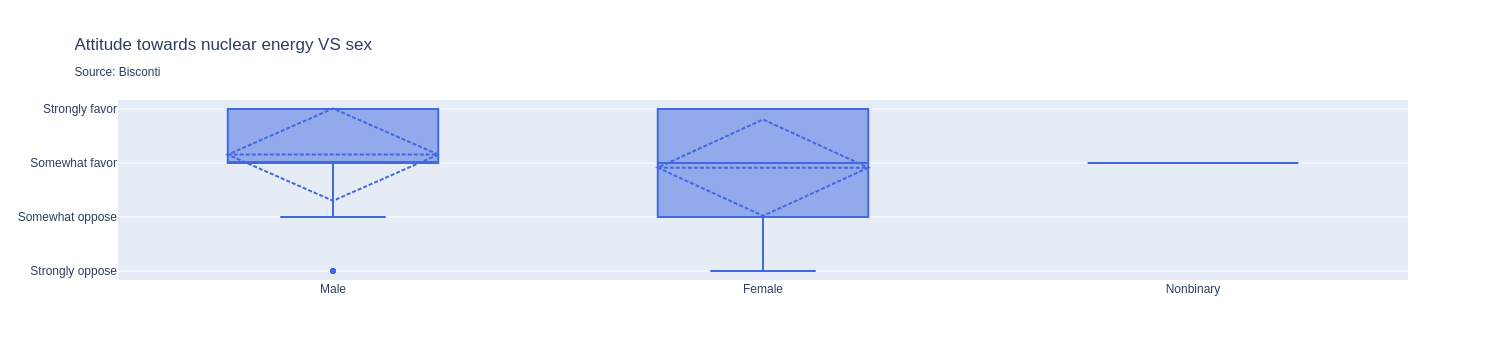

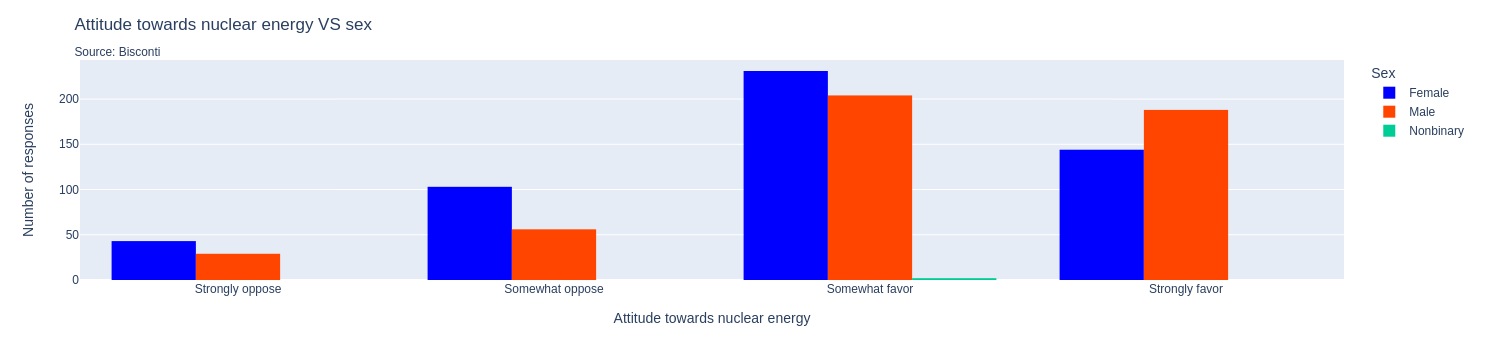

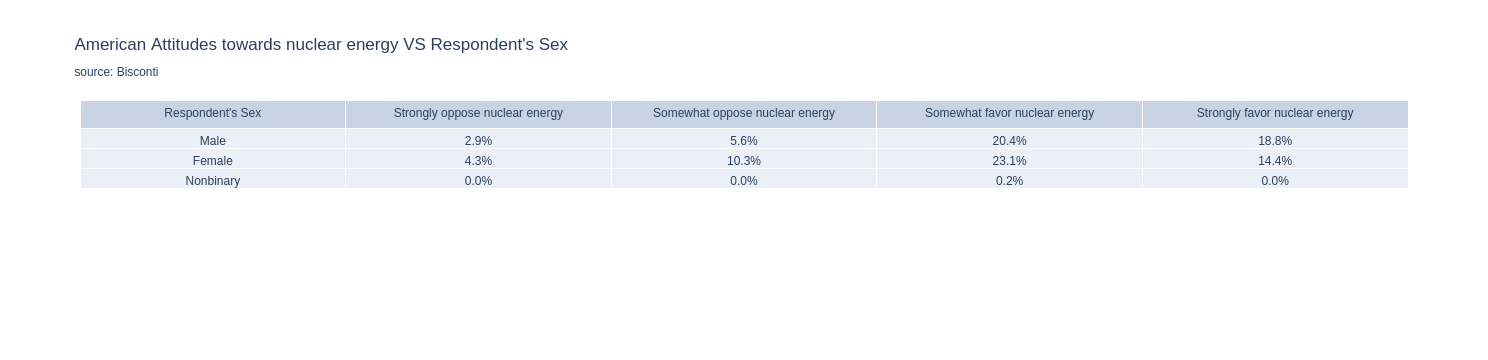

In [134]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q1"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list)
fig.update_layout(title_text="Attitude towards nuclear energy VS sex<br><sub>Source: Bisconti")
fig.show()

dataframe1_temp = dataframe1.copy()
dataframe1_temp.sort_values(['Q1'],ascending=[True],inplace=True)
fig = px.histogram(dataframe1_temp, x="Q10", color="Q1", barmode="group", color_discrete_map={"Male": 'orangered', "Female": 'blue'}).update_xaxes(categoryorder='array', categoryarray=fav_list).update_layout(
xaxis_title="Attitude towards nuclear energy", yaxis_title="Number of responses", legend_title = "Sex"
)
fig.update_layout(title_text="Attitude towards nuclear energy VS sex<br><sub>Source: Bisconti")
fig.show()

dataframe1["Q1"].value_counts()

create_table(dataframe1, "Q1", ["Male", "Female", "Nonbinary"], "Respondent's Sex")

### Political views 

When looking at the first histogram, moderates seem to be very much in support of nuclear, as most there are many who consider themselves a moderate, and fall within the somewhat favor and strongly favor categories.

But when looking at the third plot, the bar chart with a mean, it shows that people who consider themselves very conservative are the ones most likely to support nuclear. Moderates are actually the second most least likely to support nuclear energy. This is definately not what I'd expect, as I'd expect liberals would be more in support. 
- The table shows that all groups are more than not in support of nuclear energy
- Most respondants were Moderate. After that, it was conservatives

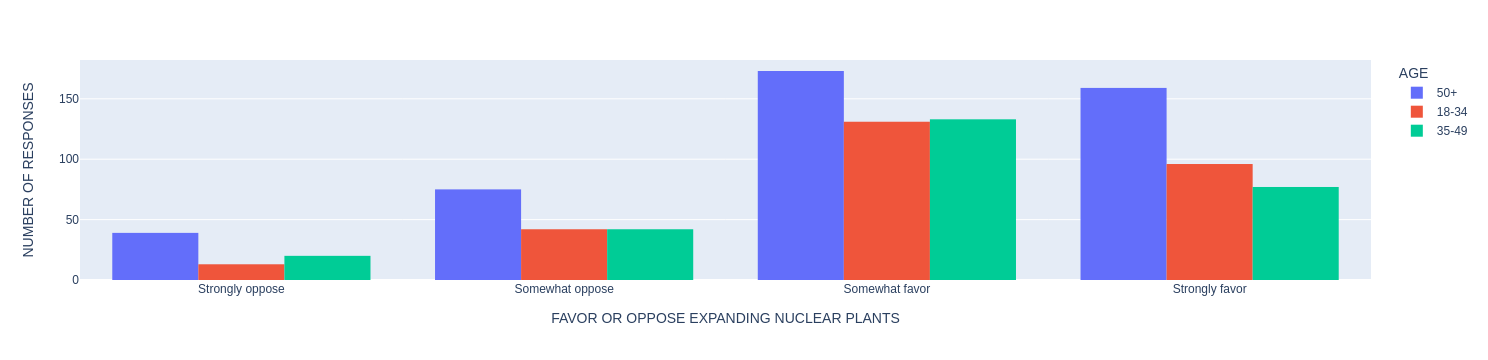

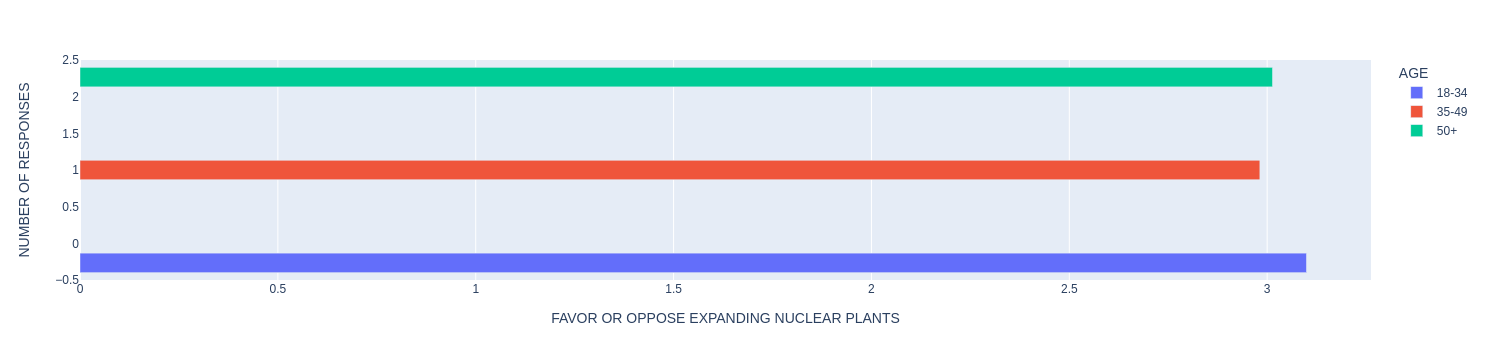

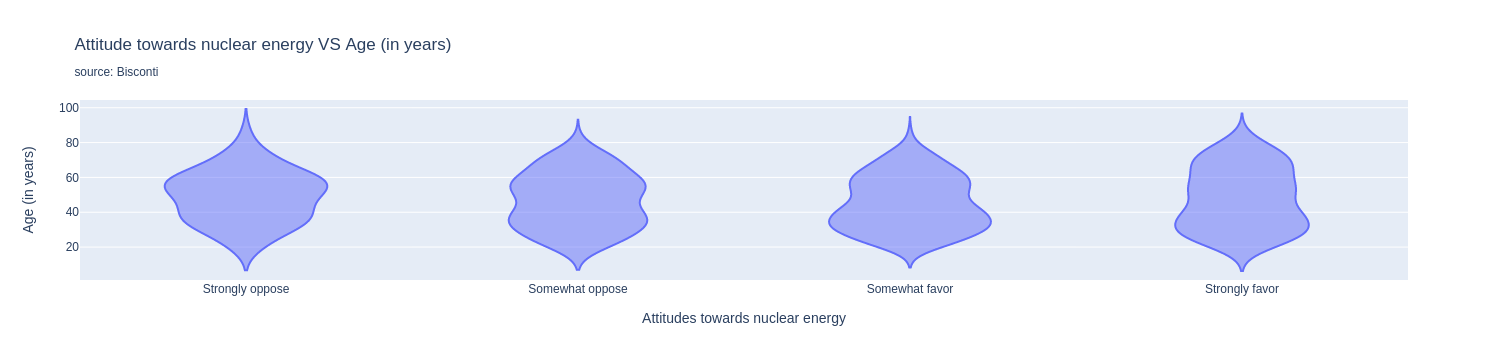

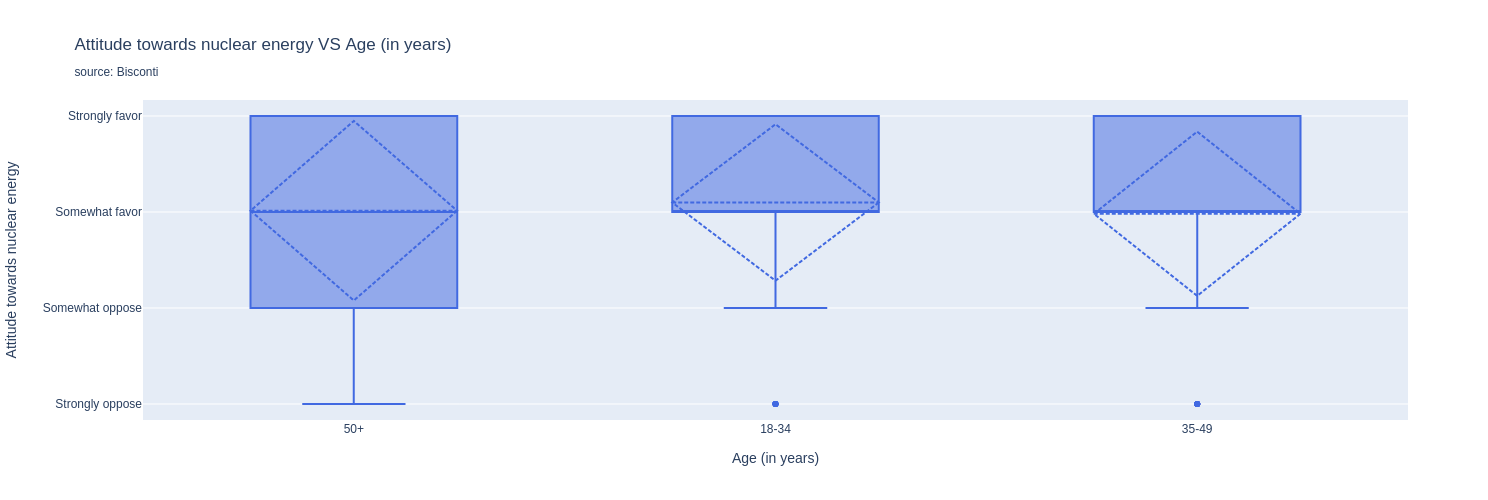

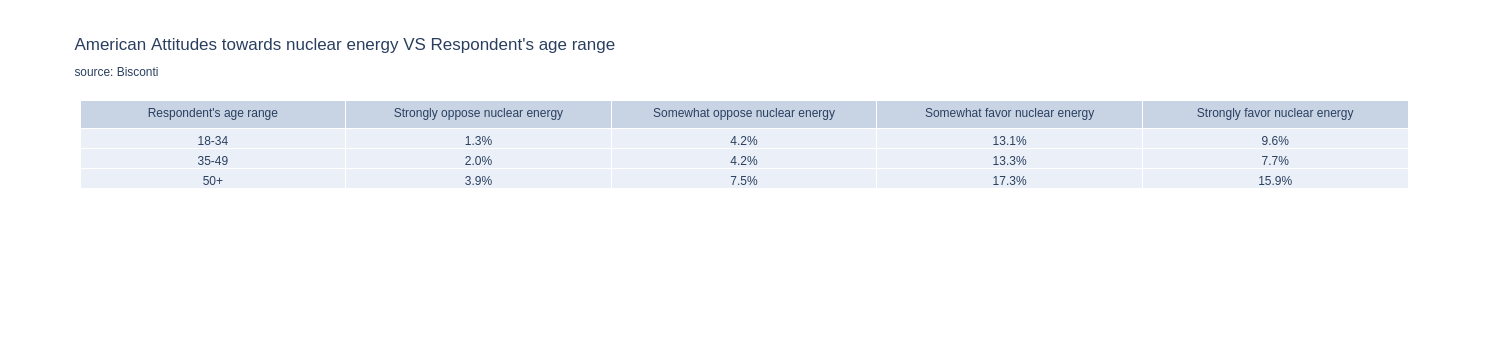

In [136]:
# Update this one to use Q2 instead of hAge1. Find the mean or something
# Maybe use a percentage or something 
fig = px.histogram(dataframe1, x="Q10", color="hAge1", barmode="group").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Somewhat oppose", "Somewhat favor", "Strongly favor"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONSES", legend_title="AGE",
)
fig.show()

mean_df = mean_df_gen("hAge1")
fig = px.bar(mean_df, x="Q10", color="hAge1", barmode="group").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Somewhat oppose", "Somewhat favor", "Strongly favor"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONSES", legend_title="AGE",
)
fig.show()


# Q2 is exact age
fig = px.violin(dataframe1, x="Q10", y="Q2", title="Bisconti" ).update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Somewhat oppose", "Somewhat favor", "Strongly favor"]).update_layout(
xaxis_title="Attitudes towards nuclear energy", yaxis_title="Age (in years)", legend_title="Age or respondent",
).update_layout(title_text="Attitude towards nuclear energy VS Age (in years)<br><sub>source: Bisconti")
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["hAge1"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_layout(
yaxis_title="Attitude towards nuclear energy", xaxis_title="Age (in years)",
    title_text="Attitude towards nuclear energy VS Age (in years)<br><sub>source: Bisconti",
    height=500
)
fig.show()

dataframe1["hAge1"].value_counts()

create_table(dataframe1, "hAge1", ["18-34", "35-49", "50+"], "Respondent's age range")

## Age

- Most fall within the somewhat favor group
- A somewhat expected result from the violin plot shows that younger generations generally favor nuclear more
- The survey seems to have more older generations than younger

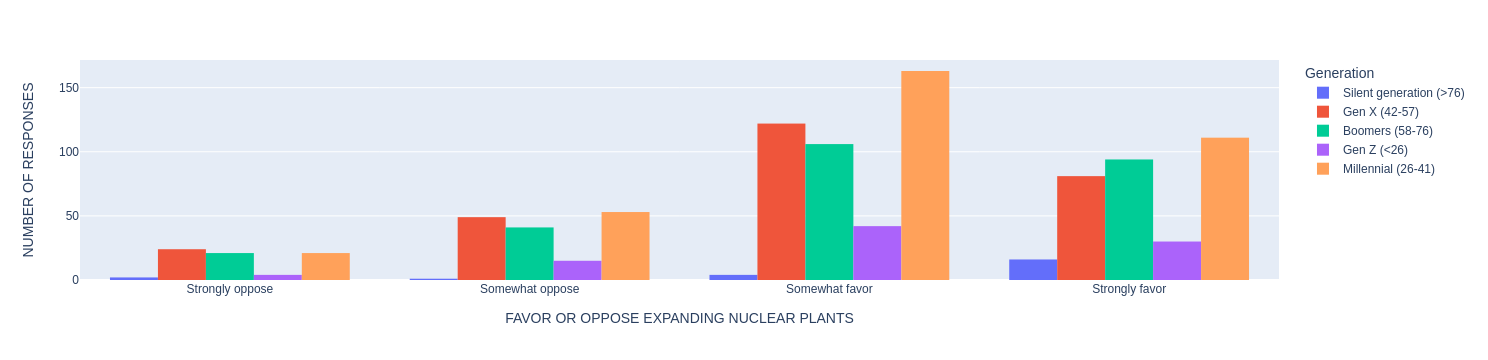

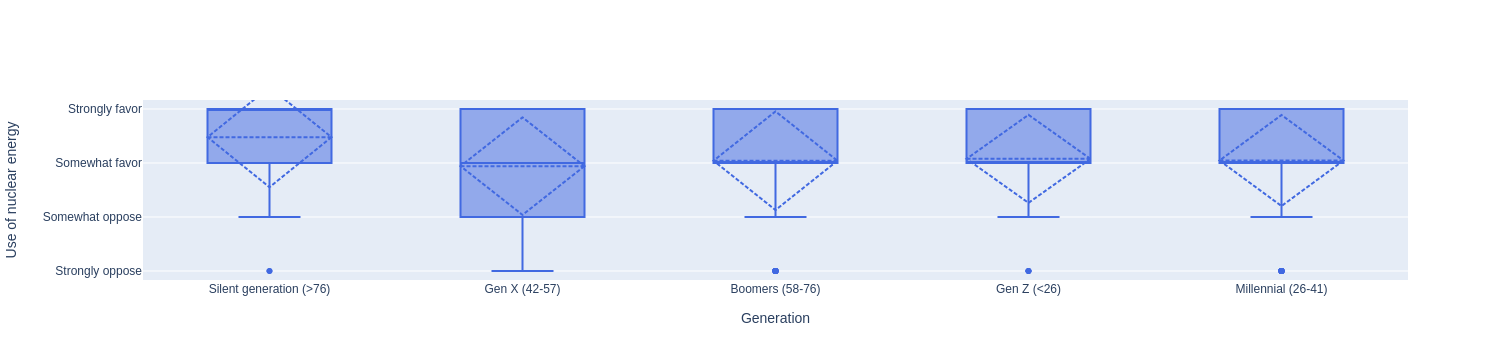

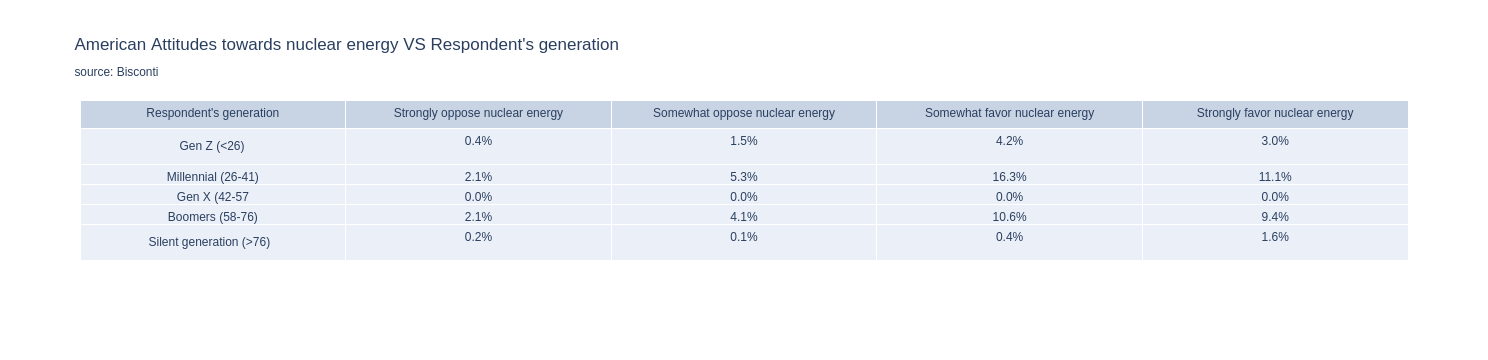

In [137]:
fig = px.histogram(dataframe1, x="Q10", color="hAge2", barmode="group").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Somewhat oppose", "Somewhat favor", "Strongly favor"]).update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONSES", legend_title="Generation",
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["hAge2"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_layout(
yaxis_title="Use of nuclear energy", xaxis_title="Generation",
)
fig.show()

dataframe1["hAge2"].value_counts()

create_table(dataframe1, "hAge2", ["Gen Z (<26)", "Millennial (26-41)", "Gen X (42-57", "Boomers (58-76)", "Silent generation (>76)"], "Respondent's generation")

# Generation

The largest group is Millennials, which could make sense because millennials range from 26 to 41, and that's the majority of responses from both ages groups from the previous chart (18-24 and 35-49)

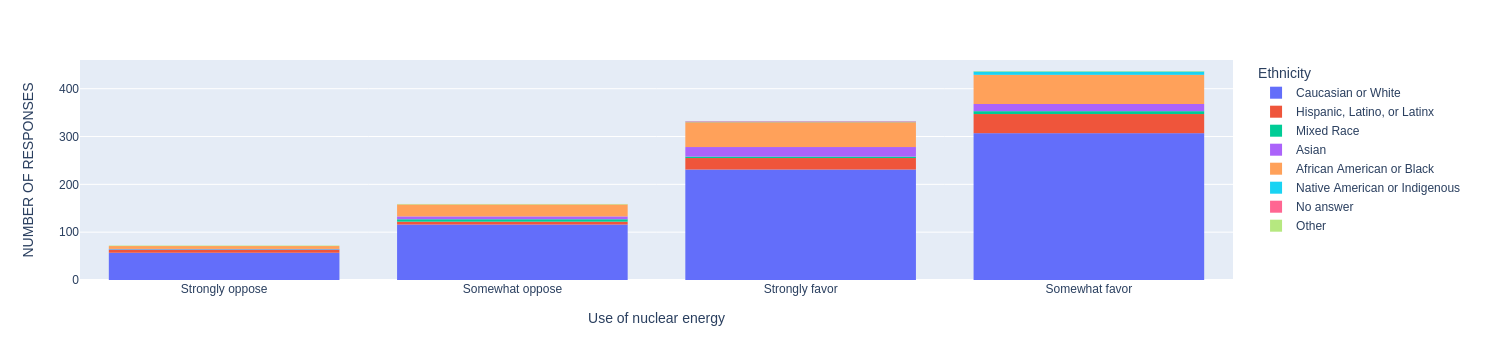

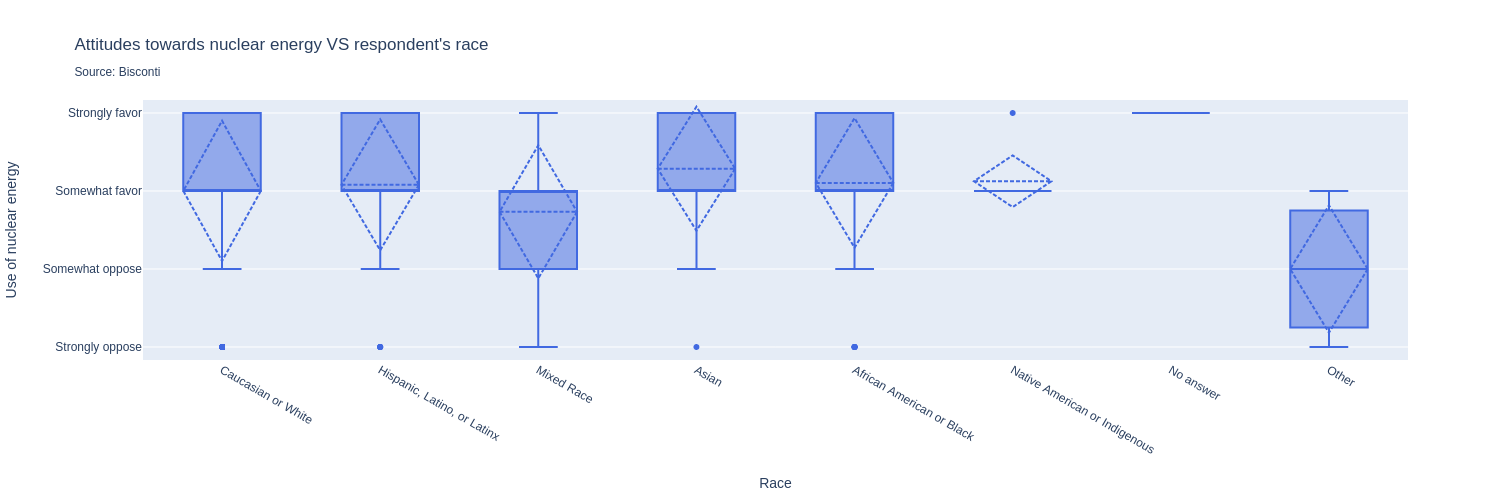

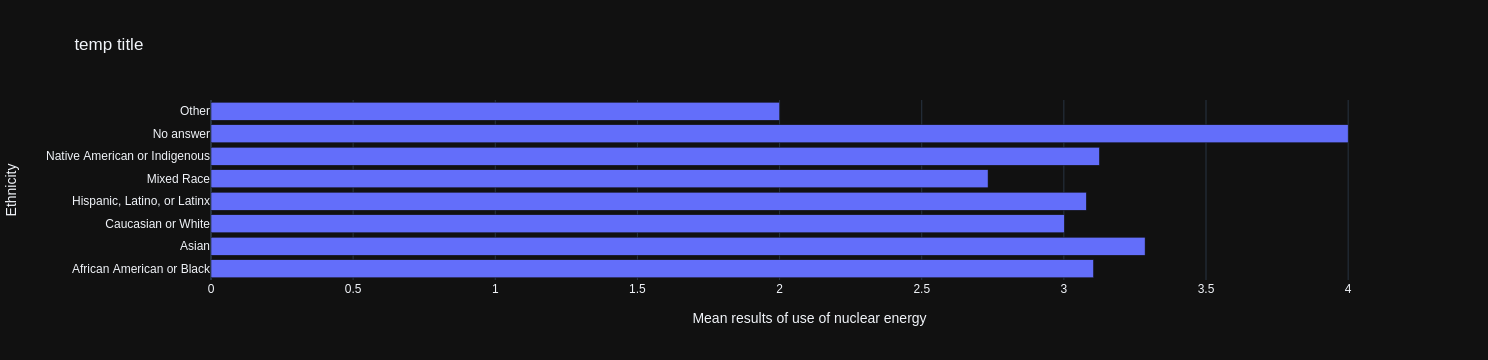

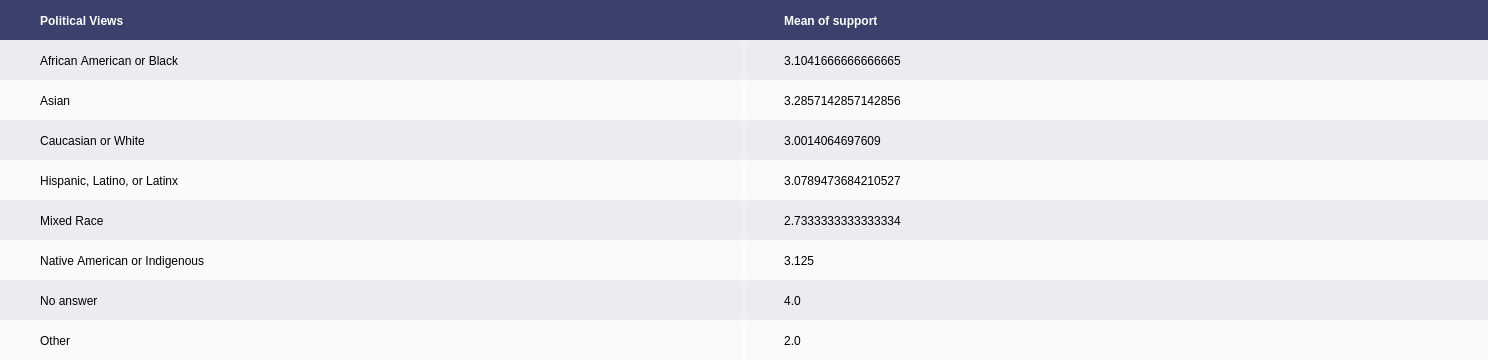

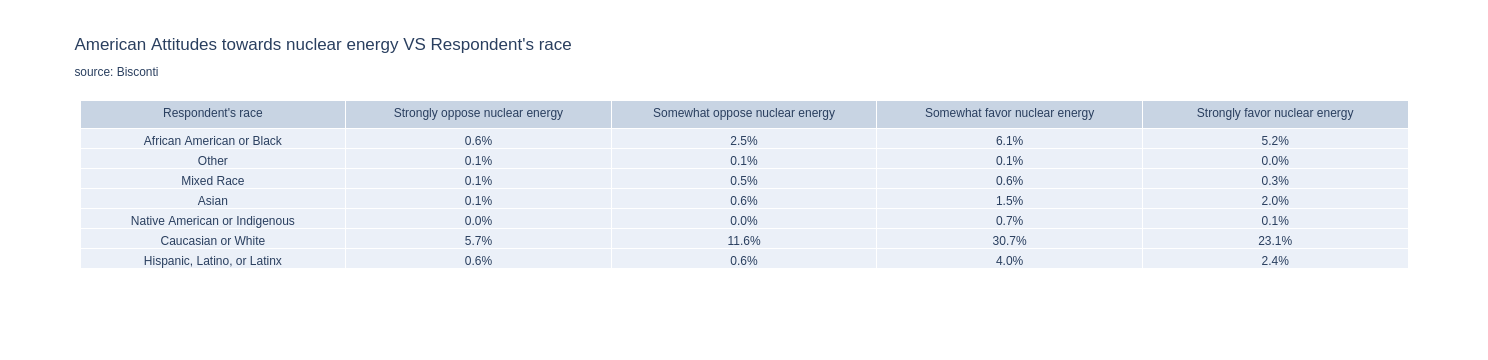

In [138]:
fig = px.histogram(dataframe1, x="Q10", color="Q3").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Somewhat oppose", "Somewhat favor", "Strongly favor"]).update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="Use of nuclear energy", yaxis_title="NUMBER OF RESPONSES", legend_title="Ethnicity",
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q3"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_layout(
yaxis_title="Use of nuclear energy", xaxis_title="Race", title_text="Attitudes towards nuclear energy VS respondent's race<br><sub>Source: Bisconti", height=500
)
fig.show()

#Get mean
mean_df = mean_df_gen("Q3")

title = "temp title"
fig = px.bar(mean_df, x="Q10", y="Q3", template='plotly_dark', title=title).update_xaxes(categoryorder='array', categoryarray=fav_list).update_layout(
xaxis_title="Mean results of use of nuclear energy", yaxis_title="Ethnicity",
)
fig.show()

mean_df.columns =["Political Views", "Mean of support"]
fig = ff.create_table(mean_df)
fig.show()

dataframe1["Q3"].value_counts()

dfq3 = dataframe1[dataframe1.Q3 != "No answer"]
create_table(dataframe1, "Q3", list(set(dfq3["Q3"])), "Respondent's race")

# Race 

- All races besides other and mixed race support nuclear energy. Then again, this is because the sample sizes are so small for Natives, Other, and Mixed Race. 
- The largest group is white, and overall, the support is only somewhat support

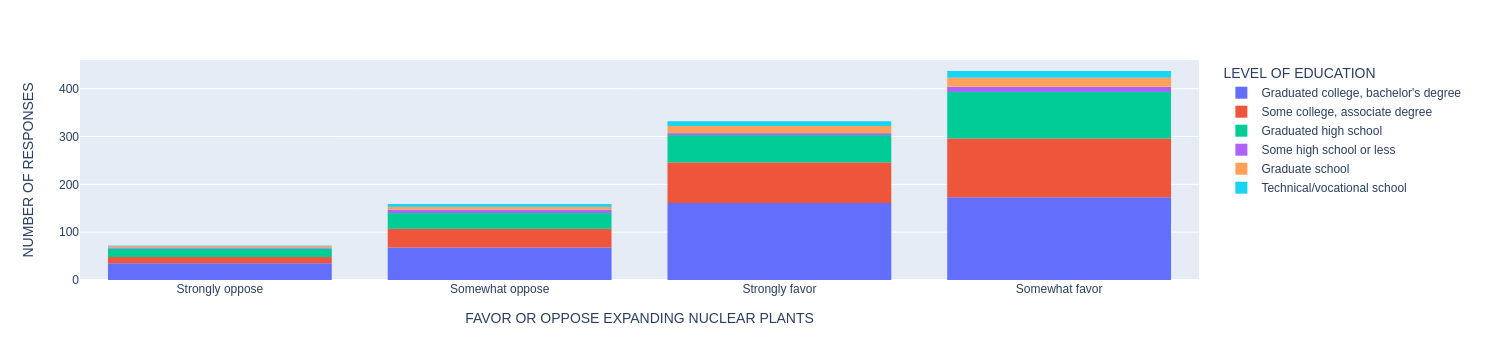

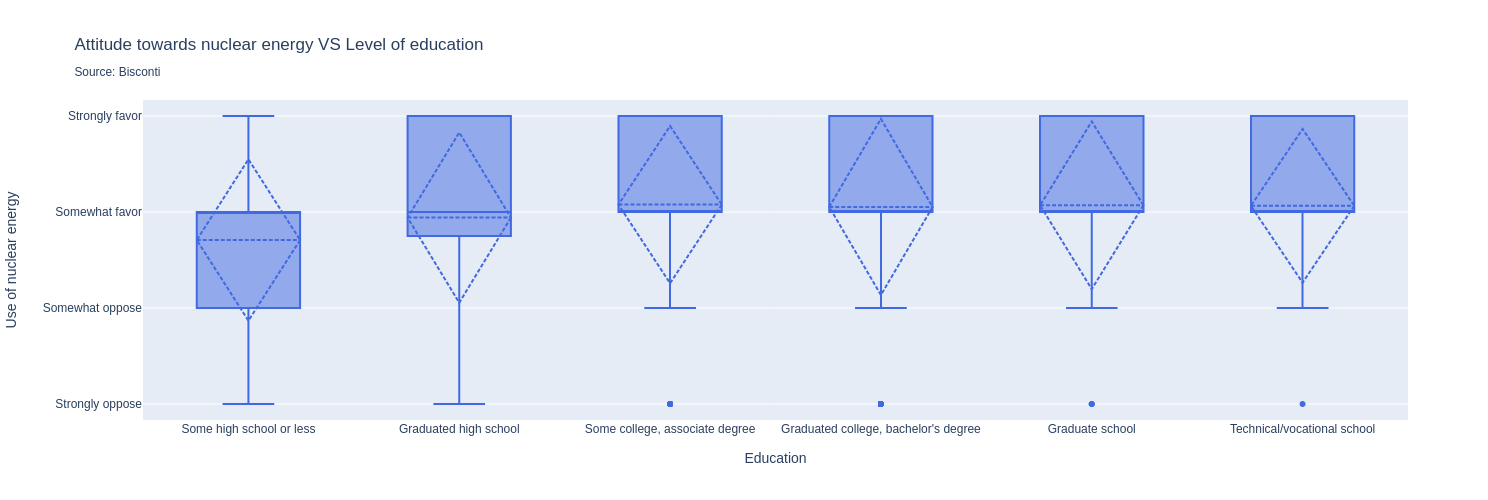

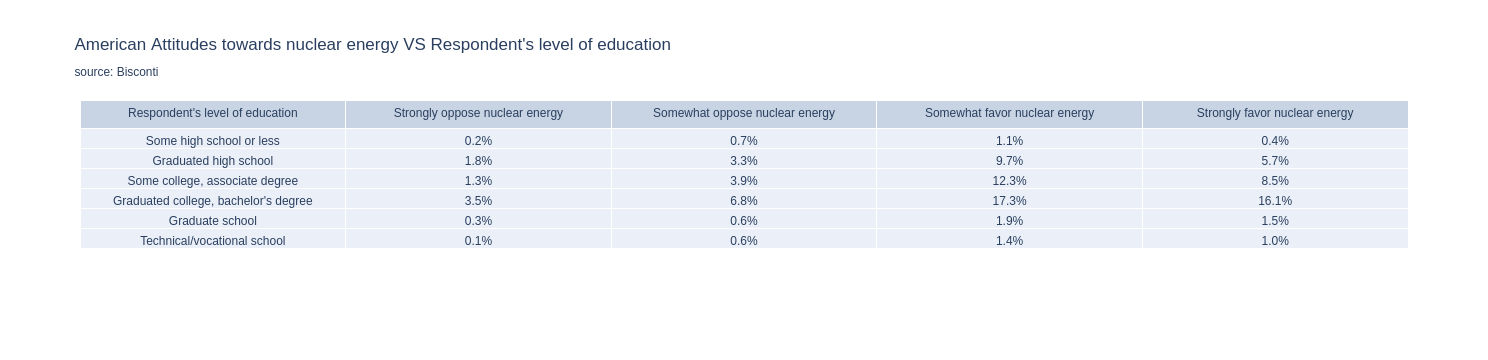

In [140]:
fig = px.histogram(dataframe1, x="Q10", color="Q4").update_xaxes(categoryorder='array', categoryarray=["Strongly oppose", "Somewhat oppose", "Somewhat favor", "Strongly favor"]).update_xaxes(categoryorder='total ascending').update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONSES", legend_title="LEVEL OF EDUCATION",
)
fig.show()

school_list = "Some high school or less", "Graduated high school", "Some college, associate degree", "Graduated college, bachelor's degree", "Graduate school", "Technical/vocational school"

fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q4"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=school_list).update_layout(
yaxis_title="Use of nuclear energy", xaxis_title="Education", title_text="Attitude towards nuclear energy VS Level of education<br><sub>Source: Bisconti"
)
fig.update_layout(height=500)
fig.show()

hs_df = dataframe1.loc[dataframe1['Q4'] == "Some high school or less"]

create_table(dataframe1, "Q4", school_list, "Respondent's levelsection of education")

In [124]:
## Education

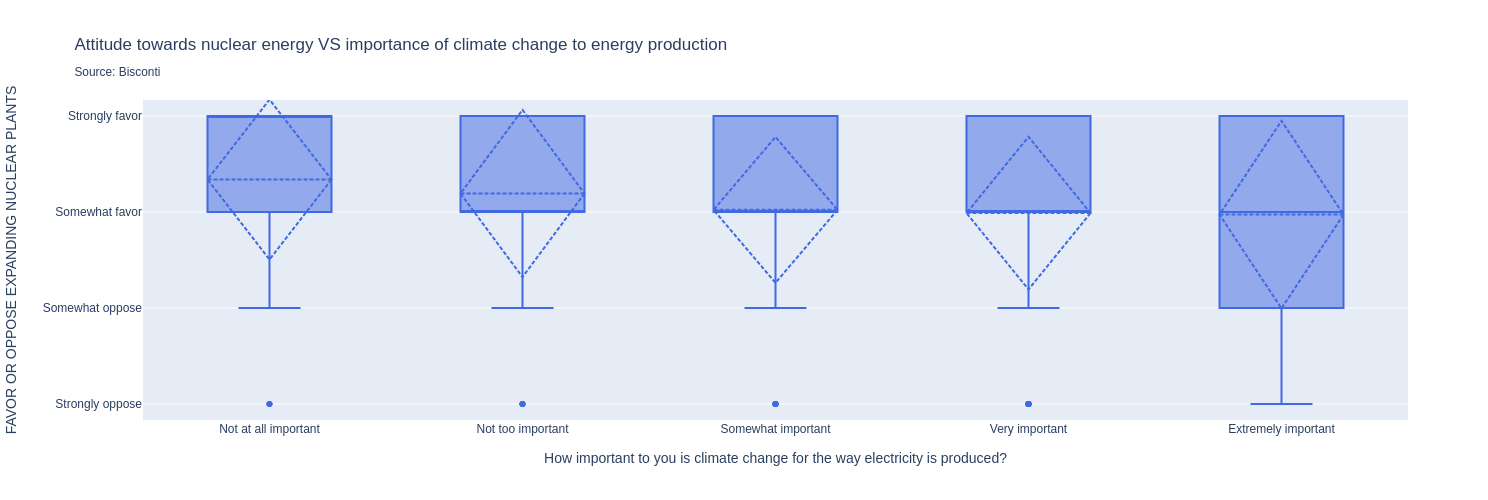

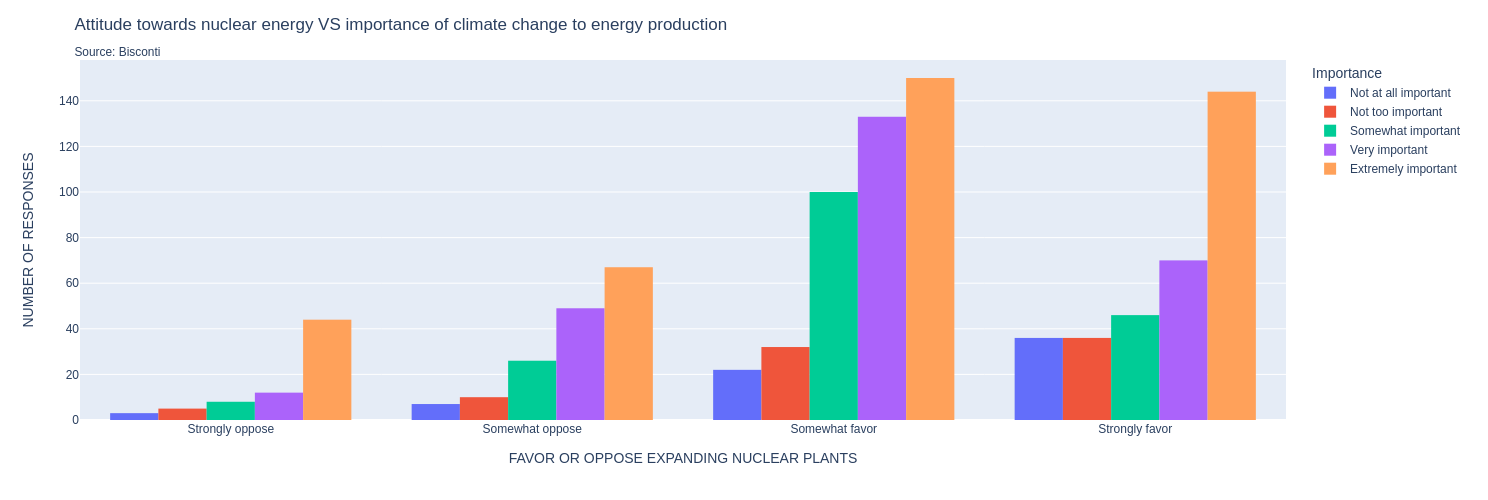

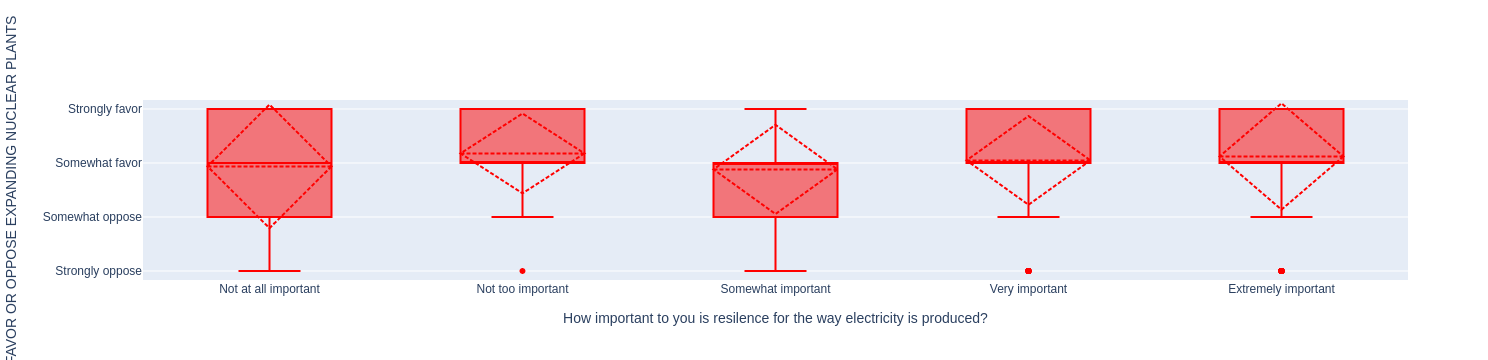

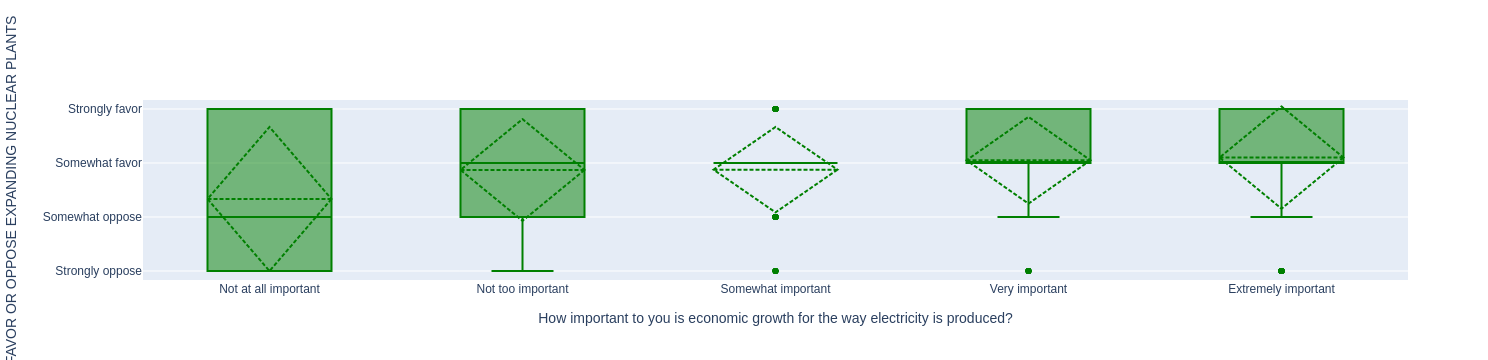

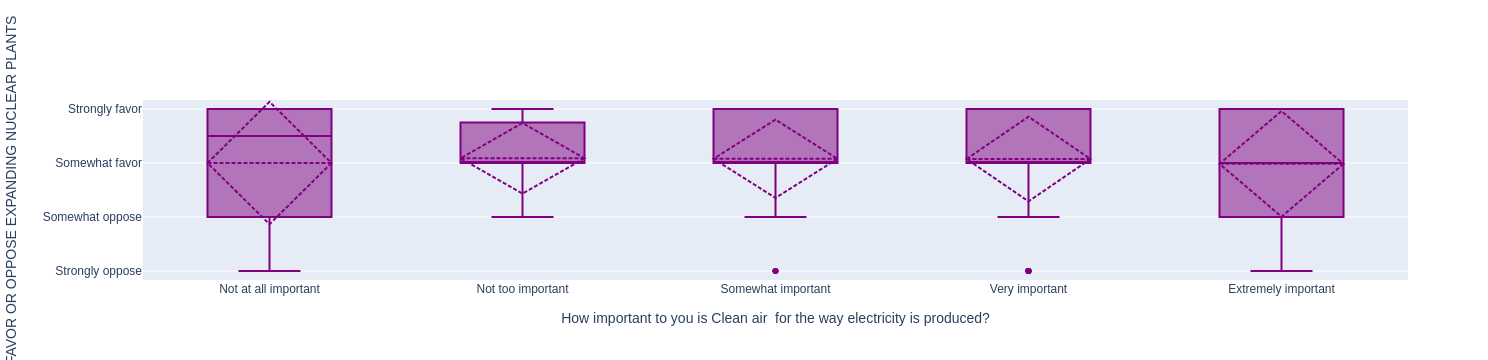

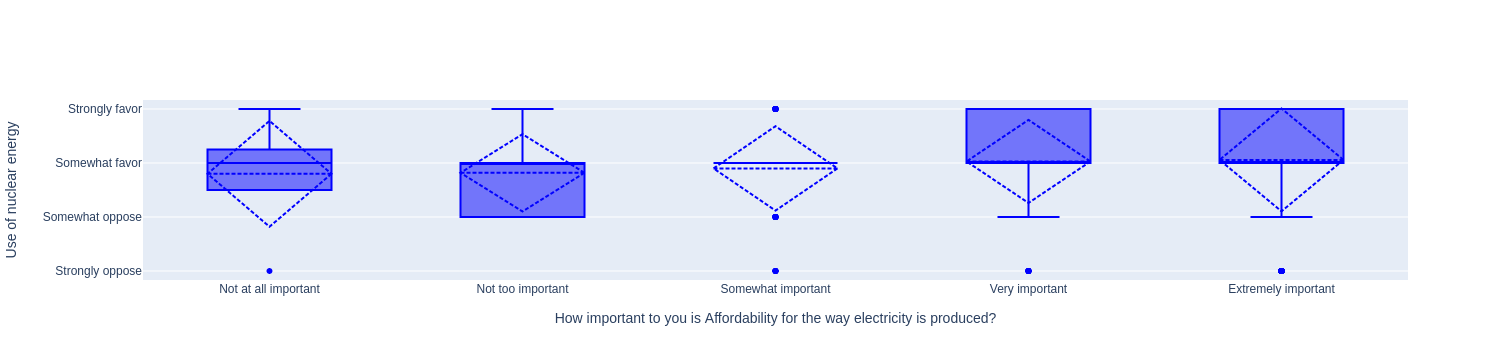

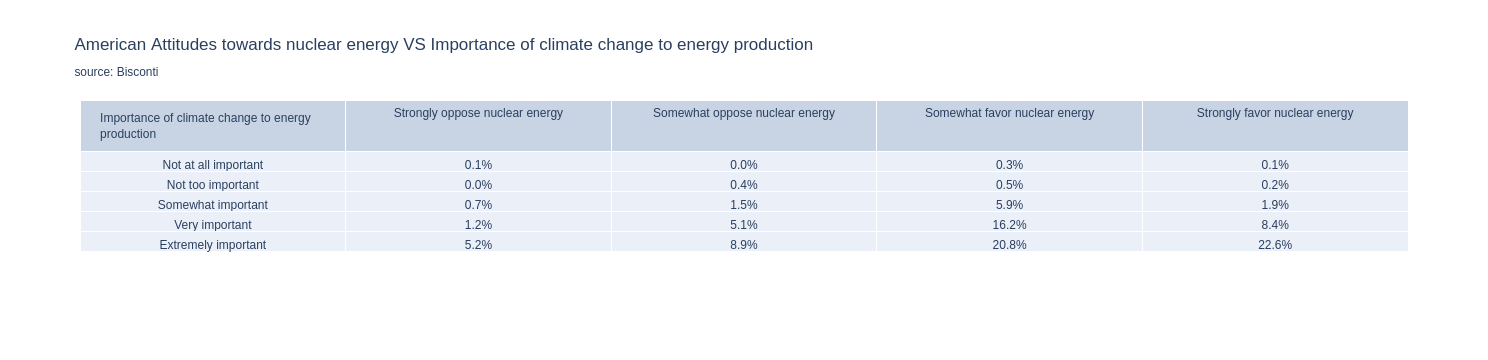

In [125]:
importance_list = ["Not at all important", "Not too important", "Somewhat important", "Very important", "Extremely important"]

dataframe1["Q6r9"].value_counts()

fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q6r9"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=importance_list).update_layout(
yaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", xaxis_title="How important to you is climate change for the way electricity is produced?",
)
fig.update_layout(height=500, title_text="Attitude towards nuclear energy VS importance of climate change to energy production<br><sub>Source: Bisconti")
fig.show()

import numpy as np
conditions = [(dataframe1['Q6r9'] == 'Not at all important'), (dataframe1['Q6r9'] == 'Not too important'),
              (dataframe1['Q6r9'] == 'Somewhat important'), (dataframe1['Q6r9'] == 'Very important'), (dataframe1['Q6r9'] == 'Extremely important')]
choices = [0,1,2,3,4]
dataframe1['order'] = np.select(conditions, choices)
dataframe1 = dataframe1.sort_values(by='order')

fig = px.histogram(dataframe1, x="Q10", color="Q6r9", barmode="group").update_xaxes(categoryorder='array', 
    categoryarray=["Strongly oppose", "Somewhat oppose", "Somewhat favor", "Strongly favor"])
fig.update_layout(
xaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", yaxis_title="NUMBER OF RESPONSES", legend_title="Importance",
)
fig.update_layout(height=500, title_text="Attitude towards nuclear energy VS importance of climate change to energy production<br><sub>Source: Bisconti")
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q6r10"],
    name='Mean & SD',
    marker_color='red',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=importance_list).update_layout(
yaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", xaxis_title="How important to you is resilence for the way electricity is produced?",
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q6r7"],
    name='Mean & SD',
    marker_color='green',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=importance_list).update_layout(
yaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", xaxis_title="How important to you is economic growth for the way electricity is produced?",
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q6r3"],
    name='Mean & SD',
    marker_color='purple',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=importance_list).update_layout(
yaxis_title="FAVOR OR OPPOSE EXPANDING NUCLEAR PLANTS", xaxis_title="How important to you is Clean air  for the way electricity is produced?",
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q6r1"],
    name='Mean & SD',
    marker_color='blue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=importance_list).update_layout(
yaxis_title="Use of nuclear energy", xaxis_title="How important to you is Affordability for the way electricity is produced?",
)
fig.show()

create_table(dataframe1, "Q6r1", importance_list, "Importance of climate change to energy production")

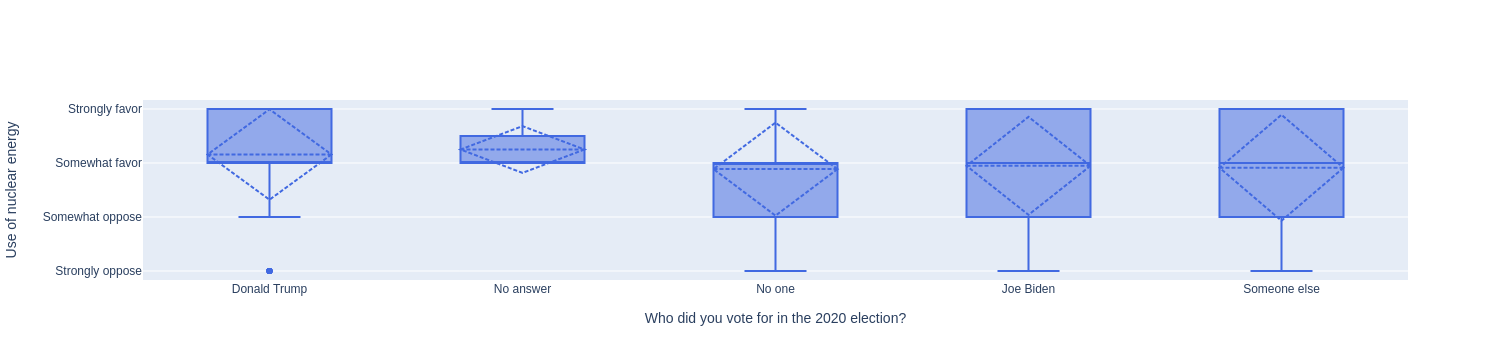

In [126]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q5b"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_layout(
yaxis_title="Use of nuclear energy", xaxis_title="Who did you vote for in the 2020 election?",
)
fig.show()

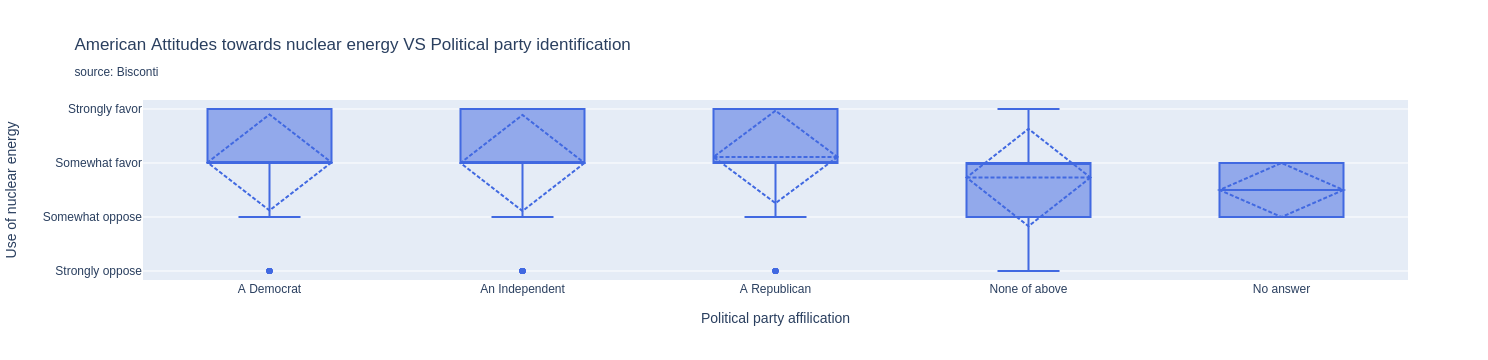

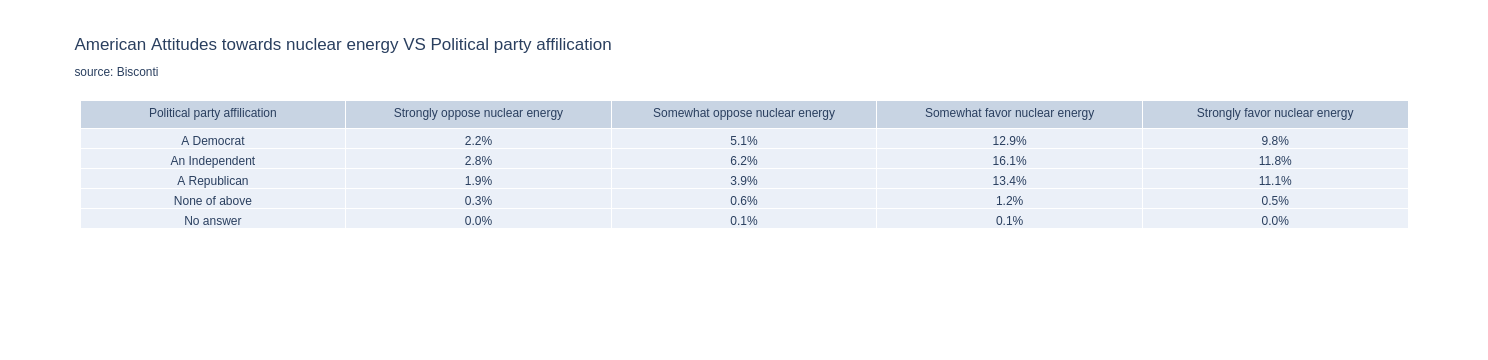

In [127]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q5"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=["A Democrat", "An Independent", "A Republican", "None of above", "No answer"]
    ).update_layout(
yaxis_title="Use of nuclear energy", xaxis_title="Political party affilication",
)
fig.update_layout(title_text="American Attitudes towards nuclear energy VS Political party identification<br><sub>source: Bisconti")
fig.show()

create_table(dataframe1, "Q5", ["A Democrat", "An Independent", "A Republican", "None of above", "No answer"], "Political party affilication")

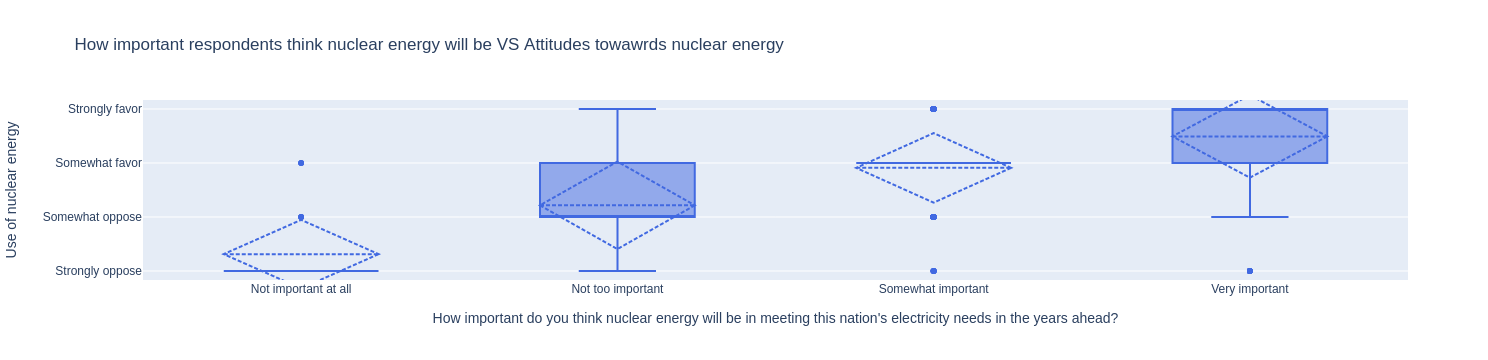

In [128]:
importance_list2 = importance_list.copy()
importance_list2[0] = "Not important at all"

fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q8"],
    name='Mean & SD',
    marker_color='royalblue',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=importance_list2).update_layout(
yaxis_title="Use of nuclear energy", xaxis_title="How important do you think nuclear energy will be in meeting this nation's electricity needs in the years ahead?",
    title_text="How important respondents think nuclear energy will be VS Attitudes towawrds nuclear energy"
)
fig.show()

#.update_xaxes(categoryorder='array', categoryarray=importance_list)
# dataframe1["Q8"].value_counts()

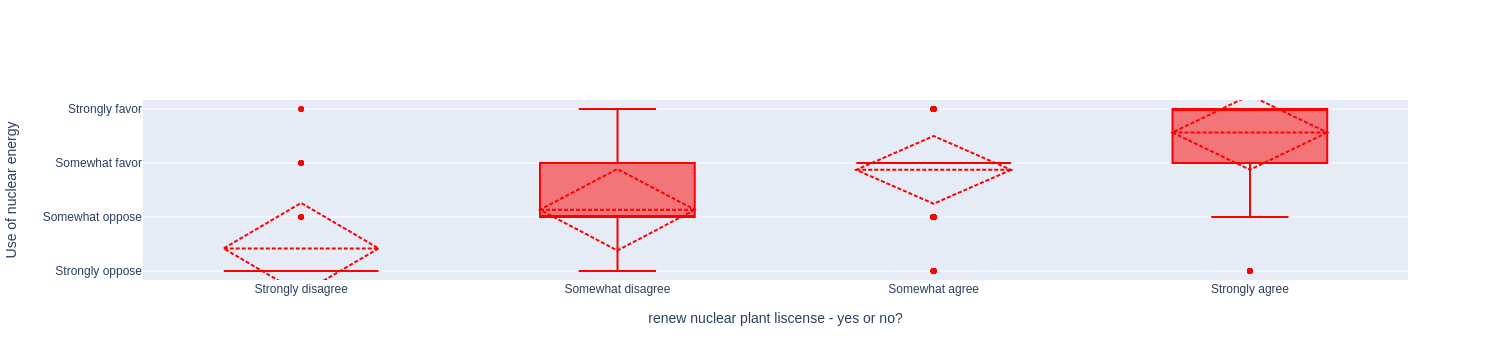

In [129]:
agree_list = ["Strongly disagree", "Somewhat disagree", "Somewhat agree", "Strongly agree"]
fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q9r1"],
    name='Mean & SD',
    marker_color='red',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=agree_list).update_layout(
yaxis_title="Use of nuclear energy", xaxis_title=" renew nuclear plant liscense - yes or no?",
)
fig.show()

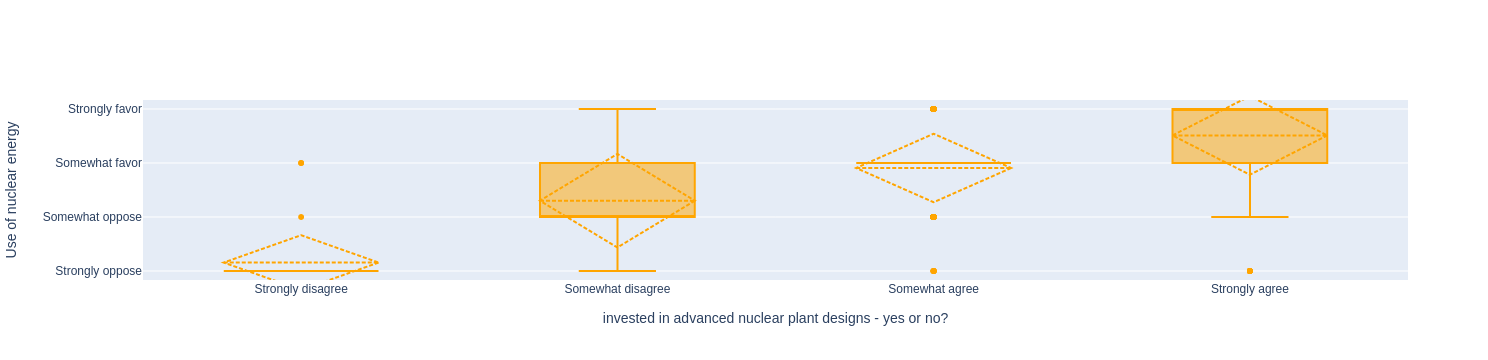

In [130]:

fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q9r2"],
    name='Mean & SD',
    marker_color='orange',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=agree_list).update_layout(
yaxis_title="Use of nuclear energy", xaxis_title=" invested in advanced nuclear plant designs - yes or no?",
)
fig.show()

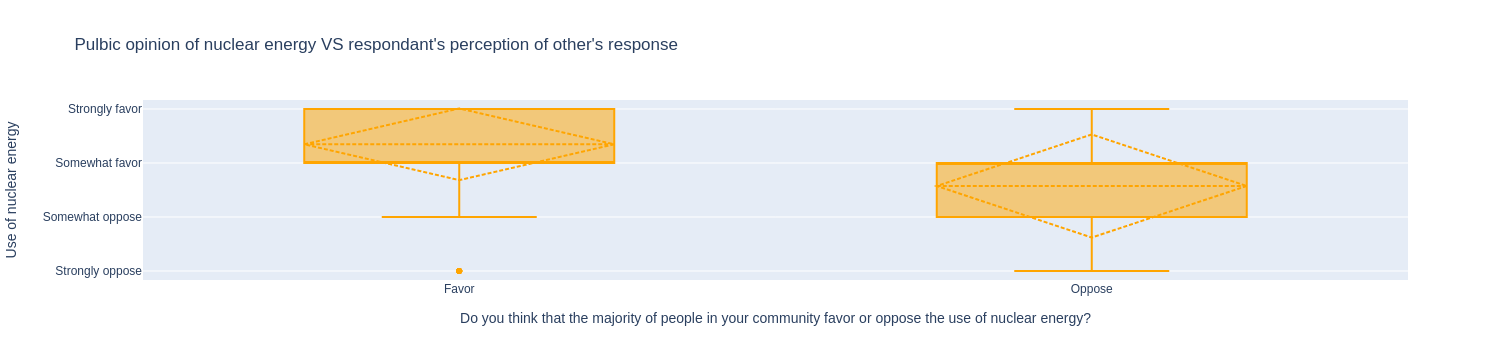

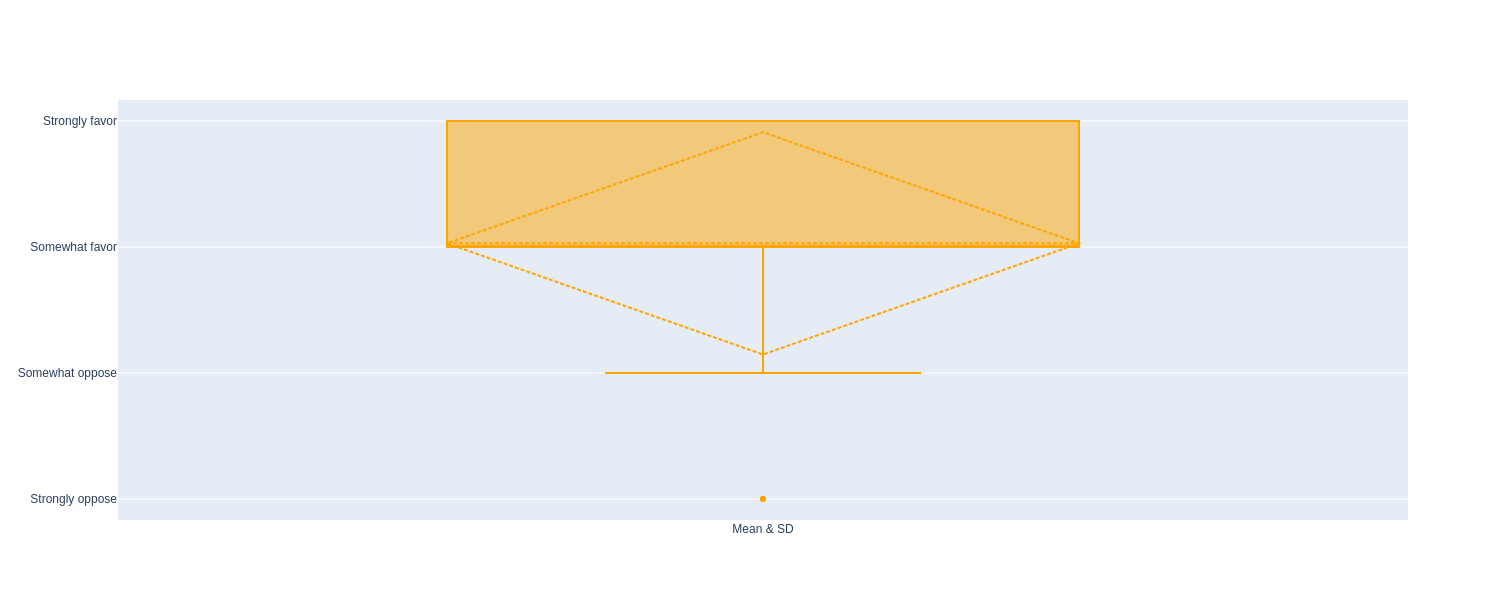

In [131]:

fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q11"],
    name='Mean & SD',
    marker_color='orange',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=agree_list).update_layout(
yaxis_title="Use of nuclear energy", xaxis_title="Do you think that the majority of people in your community favor or oppose the use of nuclear energy?", title_text="Pulbic opinion of nuclear energy VS respondant's perception of other's response"
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    #x=dataframe1["Q11"],
    name='Mean & SD',
    marker_color='orange',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list)#.update_xaxes(categoryorder='array', categoryarray=agree_list).update_layout(
#yaxis_title="Use of nuclear energy", xaxis_title="Do you think that the majority of people in your community favor or oppose the use of nuclear energy?", title_text="Pulbic opinion of nuclear energy VS respondant's perception of other's response"
#)
fig.update_layout(height=600, width=500)
fig.show()

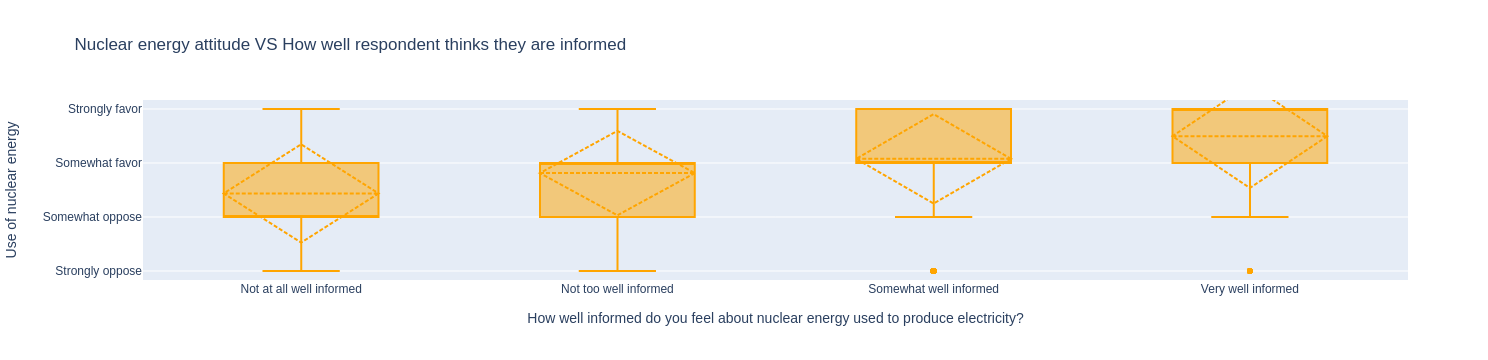

In [132]:
informed_list = ["Not at all well informed", "Not too well informed", "Somewhat well informed", "Very well informed"]
fig = go.Figure()
fig.add_trace(go.Box(
    y=dataframe1["Q10"],
    x=dataframe1["Q13"],
    name='Mean & SD',
    marker_color='orange',
    boxmean='sd' # represent mean and standard deviation
)).update_yaxes(categoryorder='array', categoryarray=fav_list).update_xaxes(categoryorder='array', categoryarray=informed_list).update_layout(
yaxis_title="Use of nuclear energy", xaxis_title="How well informed do you feel about nuclear energy used to produce electricity?", title_text="Nuclear energy attitude VS How well respondent thinks they are informed "
)
fig.show()

[19, 25, 121, 149]
[19, 23, 103, 166]
[16, 24, 58, 84]
[21, 34, 120, 135]
[13, 28, 100, 123]
[15, 28, 106, 130]
[1, 1, 26, 65]
[3, 3, 28, 63]
[5, 11, 48, 76]
[12, 10, 21, 57]


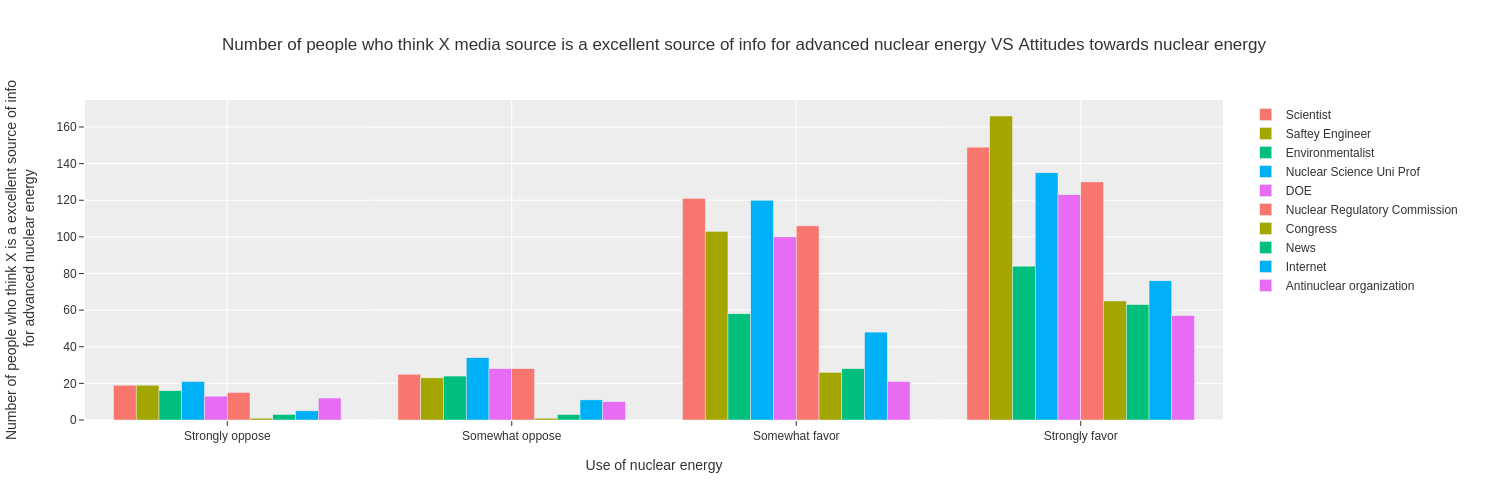

[14, 73, 200, 122]
[23, 75, 235, 128]
[20, 49, 172, 90]
[23, 62, 188, 123]
[21, 66, 210, 120]
[12, 66, 214, 121]
[10, 18, 126, 61]
[12, 40, 125, 59]
[15, 36, 142, 79]
[21, 44, 135, 57]


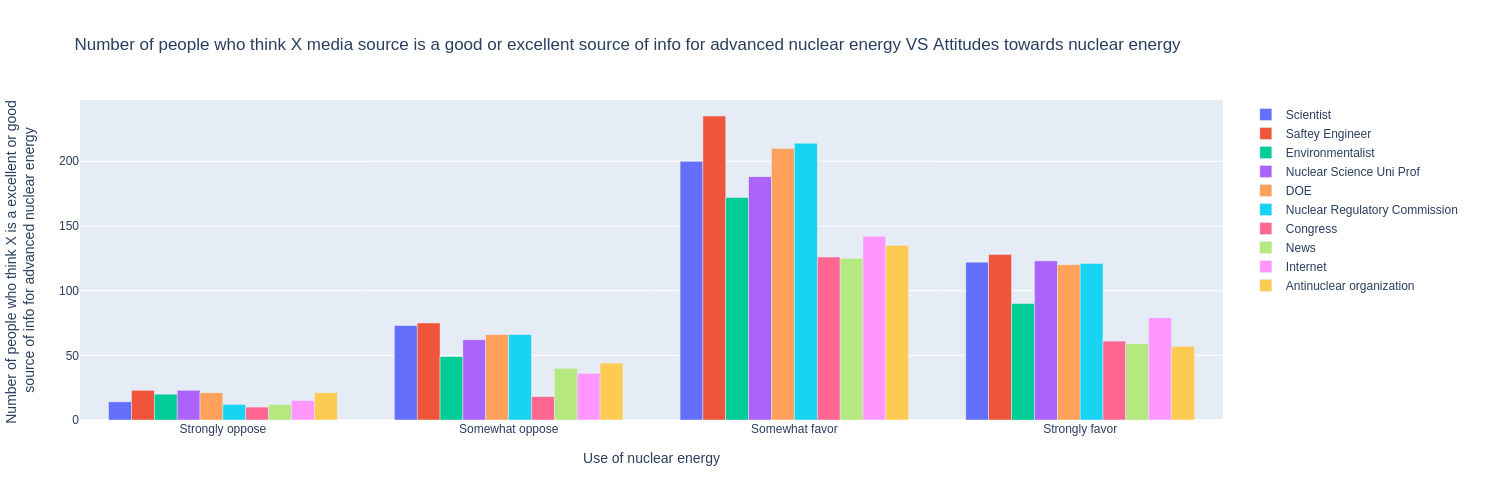

[19, 18, 14, 14]
[17, 15, 11, 7]
[18, 20, 54, 93]
[10, 15, 19, 24]
[16, 17, 18, 26]
[22, 18, 18, 16]
[45, 76, 133, 128]
[35, 60, 133, 120]
[28, 56, 105, 85]
[26, 43, 148, 159]


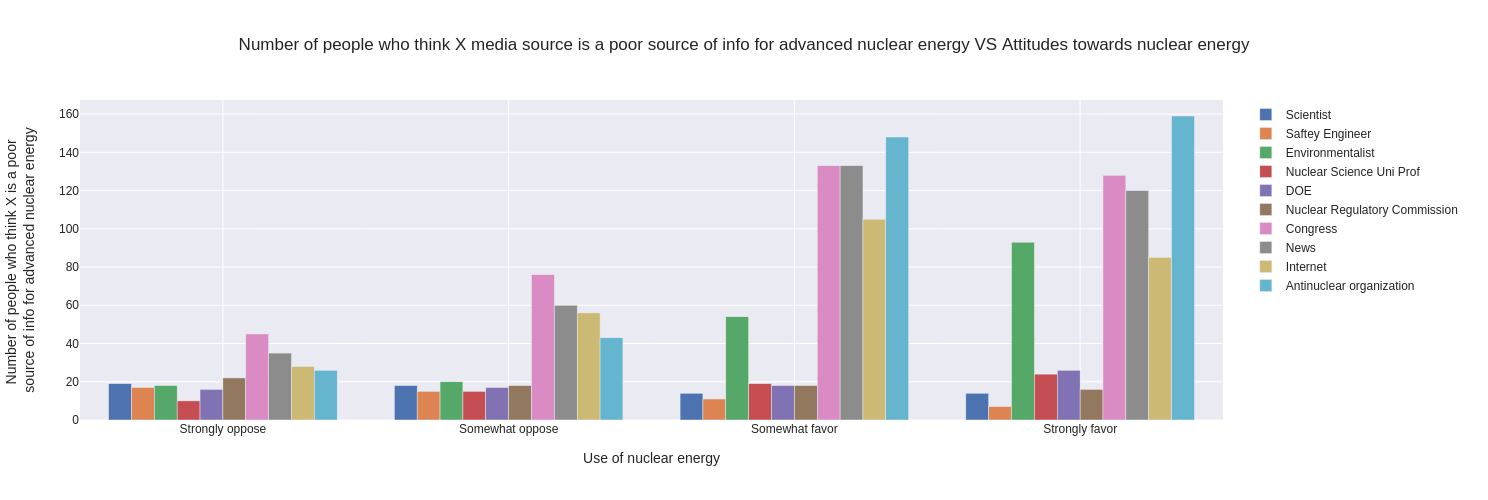

In [133]:
def excellent_list(q_dict):
    temp_list = [0, 0, 0, 0]
    for i in list(q_dict.keys()):
        if "Excellent" in i:
            if "Strongly oppose" in i:
                temp_list[0] = q_dict[i]
            if "Somewhat oppose" in i:
                temp_list[1] = q_dict[i]
            if "Somewhat favor" in i:
                temp_list[2] = q_dict[i]
            if "Strongly favor" in i:
                temp_list[3] = q_dict[i]
    print(temp_list)
    return temp_list

def excellent_good_list(q_dict):
    temp_list = [0, 0, 0, 0]
    for i in list(q_dict.keys()):
        if "Excellent" in i or "Good" in i:
            if "Strongly oppose" in i:
                temp_list[0] = q_dict[i]
            if "Somewhat oppose" in i:
                temp_list[1] = q_dict[i]
            if "Somewhat favor" in i:
                temp_list[2] = q_dict[i]
            if "Strongly favor" in i:
                temp_list[3] = q_dict[i]
    print(temp_list)
    return temp_list

def poor_list(q_dict):
    temp_list = [0, 0, 0, 0]
    for i in list(q_dict.keys()):
        if "Poor" in i:
            if "Strongly oppose" in i:
                temp_list[0] = q_dict[i]
            if "Somewhat oppose" in i:
                temp_list[1] = q_dict[i]
            if "Somewhat favor" in i:
                temp_list[2] = q_dict[i]
            if "Strongly favor" in i:
                temp_list[3] = q_dict[i]
    print(temp_list)
    return temp_list

scientist_dict = dataframe1.groupby(['Q10', 'Q14r1']).size()
safety_dict = dataframe1.groupby(['Q10', 'Q14r2']).size()
environmentalist_dict = dataframe1.groupby(['Q10', 'Q14r3']).size()

nuclear_science_uni_prof_dict = dataframe1.groupby(['Q10', 'Q14r4']).size()
DOE_dict = dataframe1.groupby(['Q10', 'Q14r5']).size()
NRC_dict = dataframe1.groupby(['Q10', 'Q14r6']).size() # Nuclear Regulatory Commission 
congress_dict = dataframe1.groupby(['Q10', 'Q14r7']).size()
news_dict = dataframe1.groupby(['Q10', 'Q14r8']).size()
internet_dict = dataframe1.groupby(['Q10', 'Q14r9']).size()
antinuclear_org_dict = dataframe1.groupby(['Q10', 'Q14r10']).size()

# Excellent source of info

q14_list = ["Q14r1", "Q14r2", "Q14r3", "Q14r4", "Q14r5", "Q14r6", "Q14r7", "Q14r8", "Q14r9", "Q14r10"]
fig = go.Figure(data=[
    go.Bar(name='Scientist', x=fav_list, y=excellent_list(scientist_dict)),
    go.Bar(name='Saftey Engineer', x=fav_list, y=excellent_list(safety_dict)),
    go.Bar(name='Environmentalist', x=fav_list, y=excellent_list(environmentalist_dict)),
    go.Bar(name='Nuclear Science Uni Prof', x=fav_list, y=excellent_list(nuclear_science_uni_prof_dict)),
    go.Bar(name='DOE', x=fav_list, y=excellent_list(DOE_dict)),
    go.Bar(name='Nuclear Regulatory Commission ', x=fav_list, y=excellent_list(NRC_dict)),
    go.Bar(name='Congress', x=fav_list, y=excellent_list(congress_dict)),
    go.Bar(name='News', x=fav_list, y=excellent_list(news_dict)),
    go.Bar(name='Internet', x=fav_list, y=excellent_list(internet_dict)),
    go.Bar(name='Antinuclear organization', x=fav_list, y=excellent_list(antinuclear_org_dict))
    
]).update_xaxes(categoryorder='array', categoryarray=fav_list)
fig.update_layout(yaxis_title="Number of people who think X is a excellent source of info<br> for advanced nuclear energy",
                  xaxis_title="Use of nuclear energy",
                  title_text="Number of people who think X media source is a excellent source of info for advanced nuclear energy VS Attitudes towards nuclear energy",
                  template="ggplot2",
                  barmode='group', height=500)
fig.show()


# Excellent or good source of info
q14_list = ["Q14r1", "Q14r2", "Q14r3", "Q14r4", "Q14r5", "Q14r6", "Q14r7", "Q14r8", "Q14r9", "Q14r10"]
fig = go.Figure(data=[
    go.Bar(name='Scientist', x=fav_list, y=excellent_good_list(scientist_dict)),
    go.Bar(name='Saftey Engineer', x=fav_list, y=excellent_good_list(safety_dict)),
    go.Bar(name='Environmentalist', x=fav_list, y=excellent_good_list(environmentalist_dict)),
    go.Bar(name='Nuclear Science Uni Prof', x=fav_list, y=excellent_good_list(nuclear_science_uni_prof_dict)),
    go.Bar(name='DOE', x=fav_list, y=excellent_good_list(DOE_dict)),
    go.Bar(name='Nuclear Regulatory Commission ', x=fav_list, y=excellent_good_list(NRC_dict)),
    go.Bar(name='Congress', x=fav_list, y=excellent_good_list(congress_dict)),
    go.Bar(name='News', x=fav_list, y=excellent_good_list(news_dict)),
    go.Bar(name='Internet', x=fav_list, y=excellent_good_list(internet_dict)),
    go.Bar(name='Antinuclear organization', x=fav_list, y=excellent_good_list(antinuclear_org_dict))
    
]).update_xaxes(categoryorder='array', categoryarray=fav_list)
fig.update_layout(yaxis_title="Number of people who think X is a excellent or good <br>source of info for advanced nuclear energy",
                  xaxis_title="Use of nuclear energy",
                  title_text="Number of people who think X media source is a good or excellent source of info for advanced nuclear energy VS Attitudes towards nuclear energy",
                  barmode='group', height=500)
fig.show()

# Don't trust
# Poor source of info
q14_list = ["Q14r1", "Q14r2", "Q14r3", "Q14r4", "Q14r5", "Q14r6", "Q14r7", "Q14r8", "Q14r9", "Q14r10"]
fig = go.Figure(data=[
    go.Bar(name='Scientist', x=fav_list, y=poor_list(scientist_dict)),
    go.Bar(name='Saftey Engineer', x=fav_list, y=poor_list(safety_dict)),
    go.Bar(name='Environmentalist', x=fav_list, y=poor_list(environmentalist_dict)),
    go.Bar(name='Nuclear Science Uni Prof', x=fav_list, y=poor_list(nuclear_science_uni_prof_dict)),
    go.Bar(name='DOE', x=fav_list, y=poor_list(DOE_dict)),
    go.Bar(name='Nuclear Regulatory Commission ', x=fav_list, y=poor_list(NRC_dict)),
    go.Bar(name='Congress', x=fav_list, y=poor_list(congress_dict)),
    go.Bar(name='News', x=fav_list, y=poor_list(news_dict)),
    go.Bar(name='Internet', x=fav_list, y=poor_list(internet_dict)),
    go.Bar(name='Antinuclear organization', x=fav_list, y=poor_list(antinuclear_org_dict))
    
]).update_xaxes(categoryorder='array', categoryarray=fav_list)
fig.update_layout(yaxis_title="Number of people who think X is a poor <br>source of info for advanced nuclear energy",
                  xaxis_title="Use of nuclear energy",
                  title_text="Number of people who think X media source is a poor source of info for advanced nuclear energy VS Attitudes towards nuclear energy",
                  template="seaborn",
                  barmode='group', height=500)
fig.show()


#dict(dataframe1["Q14r1"].value_counts())
# print(dataframe1.groupby(['Q10', 'Q14r1']).size())
#scientist_dict[( 'Somewhat favor', 'Excellent')]